### Load Required Packages and Data

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cPickle as pickle
import multiprocessing
import scipy.special
import ghalton
import numpy as np
import numpy.fft as fft
import time
import os
import sys
sys.path.insert(1,'/Users/zyzdiana/GitHub/AC297r-Volume-Registration/code')

In [3]:
from utils import clean,to_radian,hann,res_to_rad,ax_to_w,rep_to_angle
from Bessel_Interp import generate_halton_points
from rotation_2d import rot_cost_func, imrotate
from visualize import plot_cost_func, plot_cost_func_t,plot_volume
from cost_functions import cf_ssd
from mask import sphere_mask

In [4]:
axes_dict = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/for_cluster/axes_dict.p','rb'))
rot_axes = ['xz', 'y', 'yz', 'xy', 'x', 'z']
ax_to_idx = {}
for rot_ax in rot_axes:
    ax_to_idx[rot_ax] = rot_axes.index(rot_ax)
    
rot_axes_tricubic = ['x', 'y', 'z', 'xy', 'yz', 'xz']
ax_to_idx_tricubic = {}
for rot_ax in rot_axes_tricubic:
    ax_to_idx_tricubic[rot_ax] = rot_axes_tricubic.index(rot_ax)%3
print ax_to_idx_tricubic

# Rotations

In [62]:
from sept23_visualize import preprocess, load_pickle,split_plot,scatter_plot_cubic, scatter_plot, scatter_plot_all_linear, error_in_time

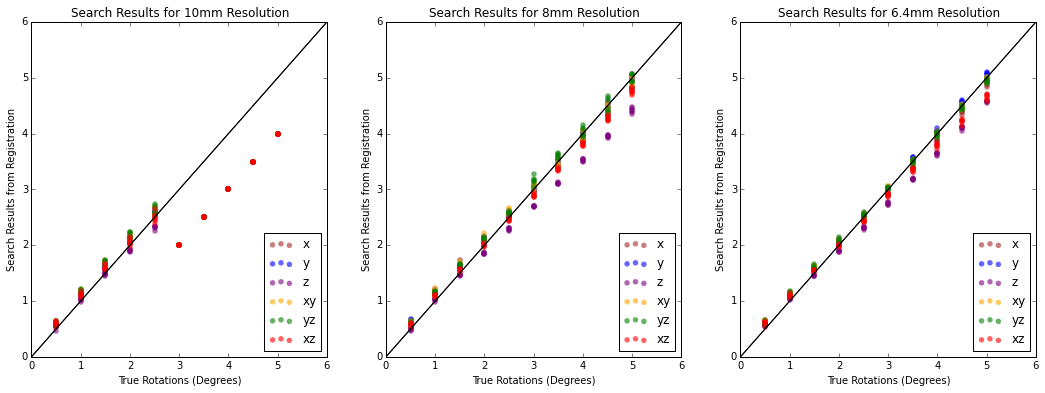

In [89]:
# # Tricubic Interpolation Results all together
cost_dict_10 = load_pickle('10','xyz')
cost_dict_10_1 = load_pickle('10','xyyzxz')

cost_dict_8 = load_pickle('8','xyz')
cost_dict_8_1 = load_pickle('8','xyyzxz')

cost_dict_6_4 = load_pickle('6_4','xyz')
cost_dict_6_4_1 = load_pickle('6_4','xyyzxz')

plt.figure(figsize = [18,6])
plt.subplot(1,3,1)
scatter_plot_cubic(cost_dict_10, '10mm', ['x','y','z'], 0.01,ax_to_idx_tricubic)
scatter_plot_cubic(cost_dict_10_1, '10mm', ['xy','yz','xz'], 0.01,ax_to_idx_tricubic)
plt.subplot(1,3,2)
scatter_plot_cubic(cost_dict_8, '8mm', ['x','y','z'],0.01,ax_to_idx_tricubic)
scatter_plot_cubic(cost_dict_8_1, '8mm', ['xy','yz','xz'],0.01,ax_to_idx_tricubic)
plt.subplot(1,3,3)
scatter_plot_cubic(cost_dict_6_4, '6.4mm', ['x','y','z'],0.01,ax_to_idx_tricubic)
scatter_plot_cubic(cost_dict_6_4_1, '6.4mm', ['xy','yz','xz'],0.01,ax_to_idx_tricubic)
plt.show()

### Show interpolation results one rotation axis per plot

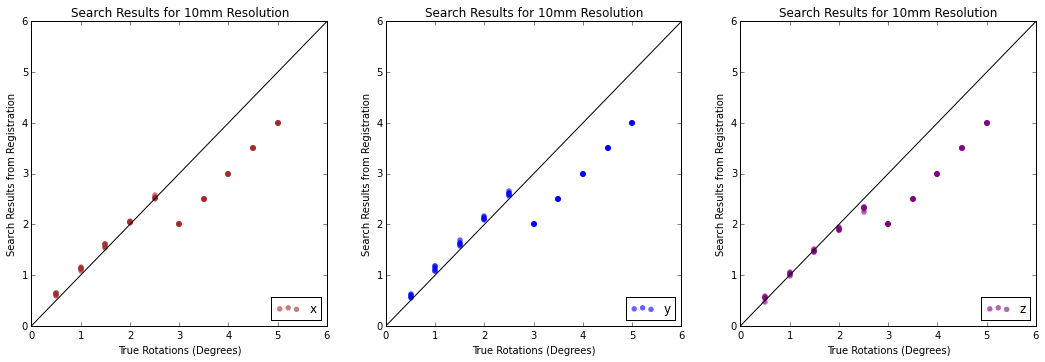

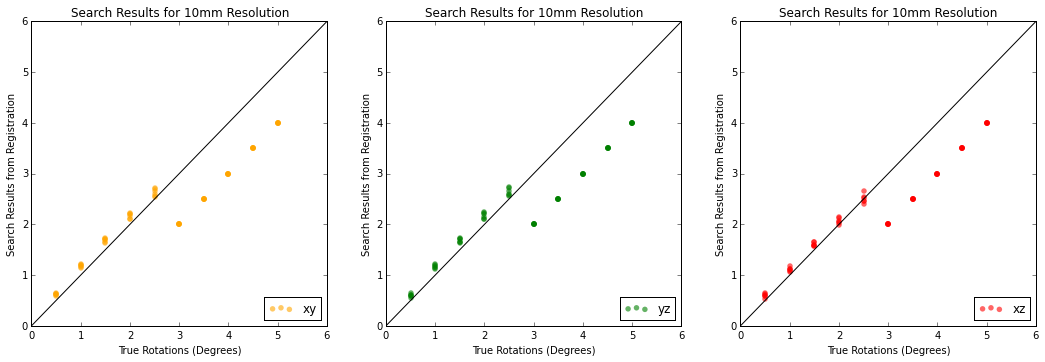

In [90]:
split_plot(cost_dict_10,cost_dict_10_1,'10mm',ax_to_idx_tricubic)

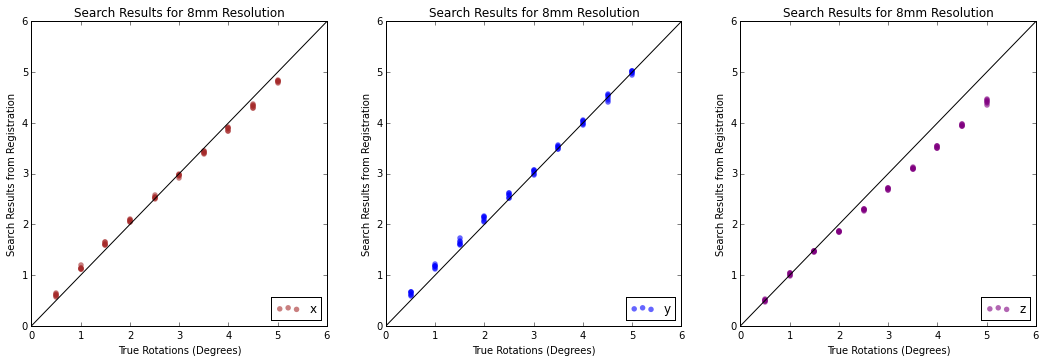

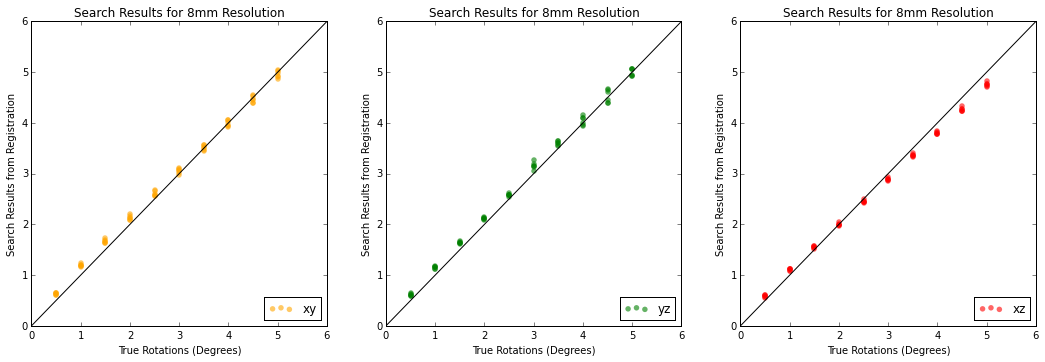

In [91]:
split_plot(cost_dict_8,cost_dict_8_1,'8mm',ax_to_idx_tricubic)

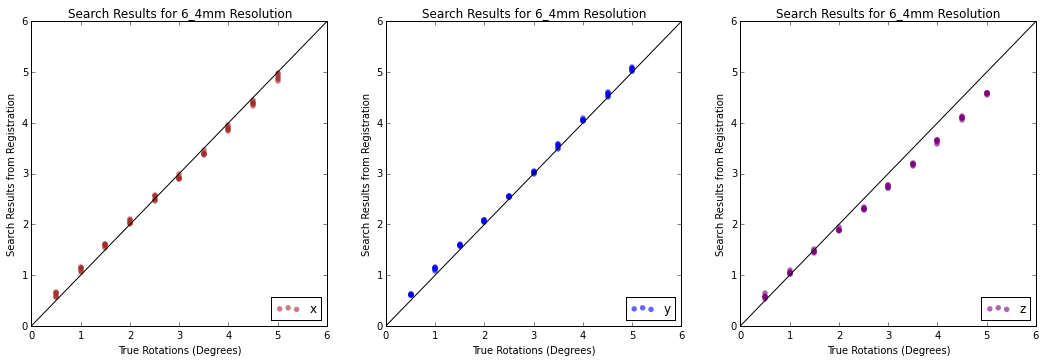

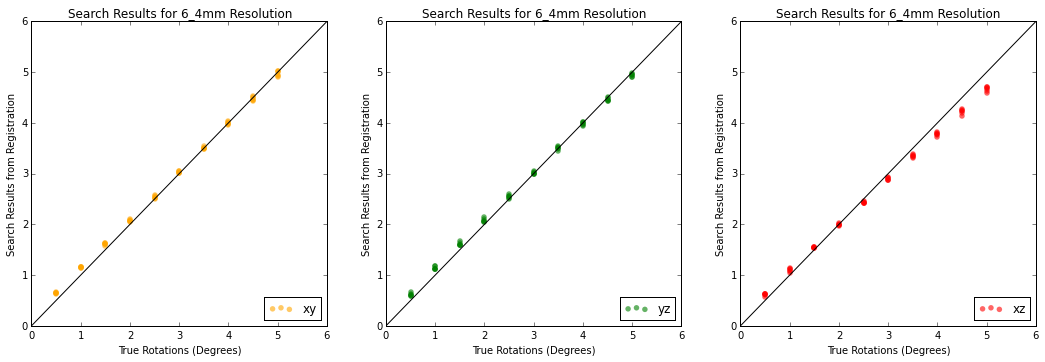

In [92]:
split_plot(cost_dict_6_4,cost_dict_6_4_1,'6_4mm',ax_to_idx_tricubic)

### Error Plots
Now for the error plot, I'm plotting true_degree-search results, without taking the absolute value of that, and I'm also drawing a threshold of [-0.05,0.05] on all plots as a reference.

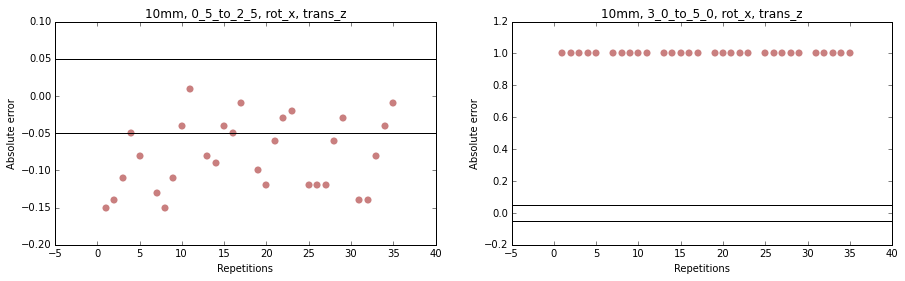

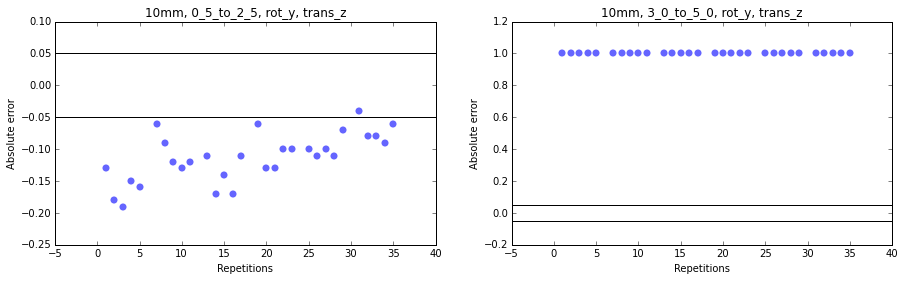

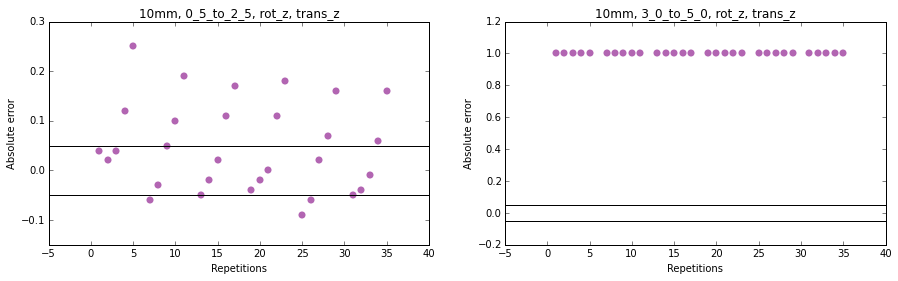

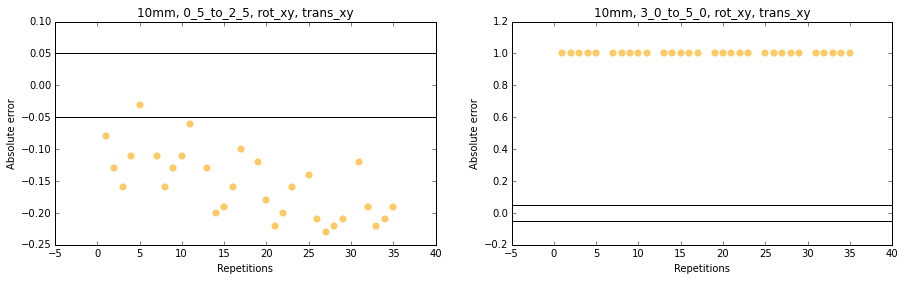

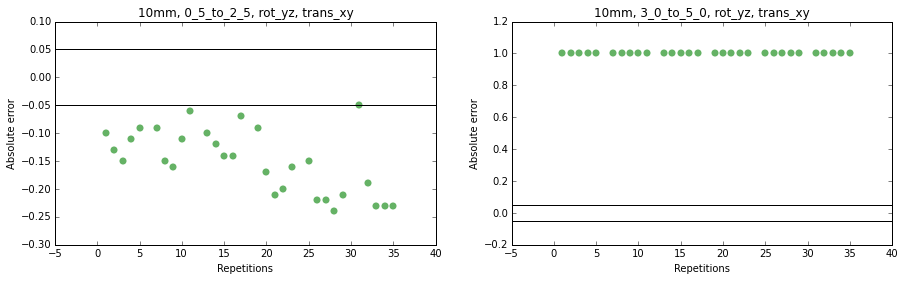

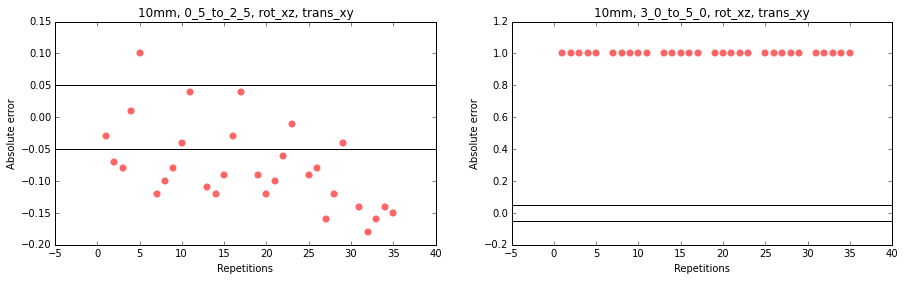

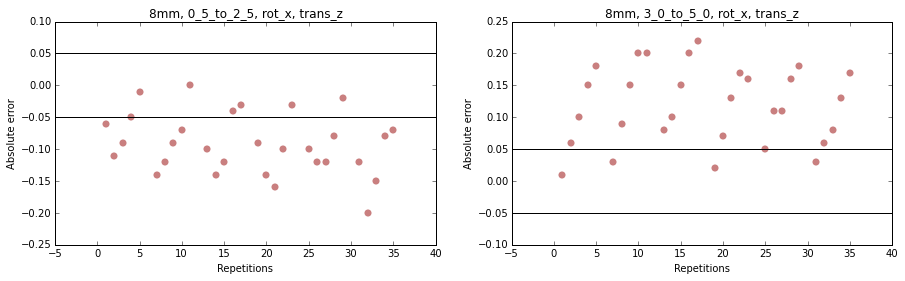

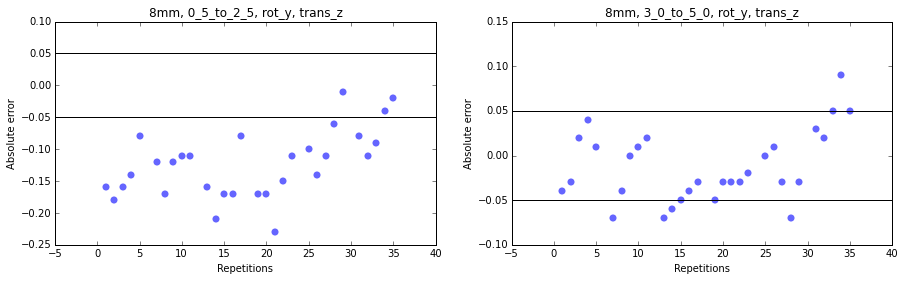

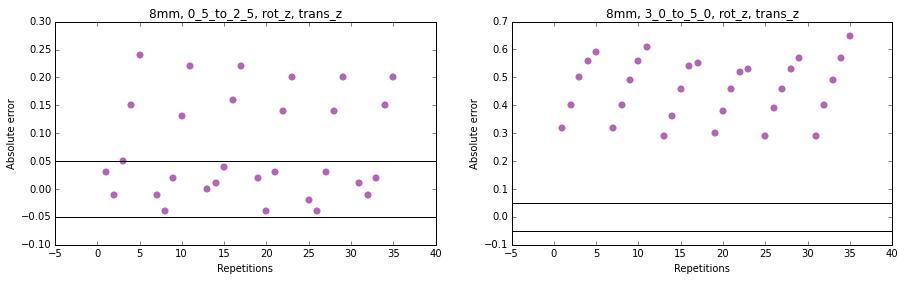

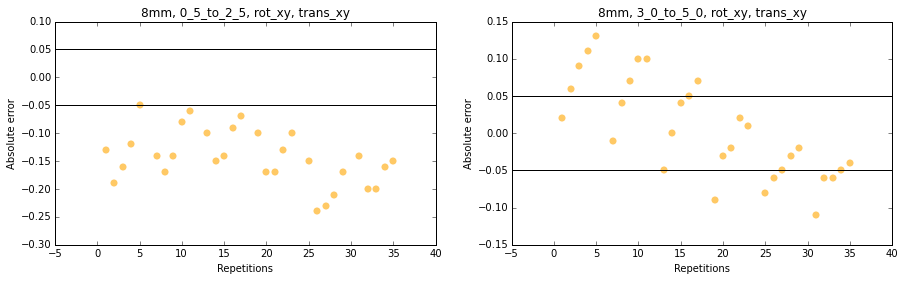

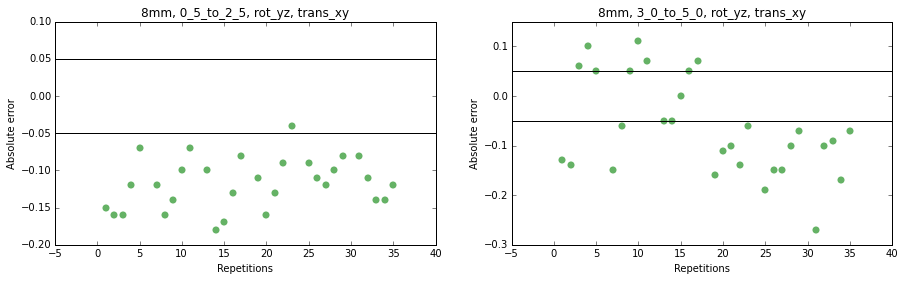

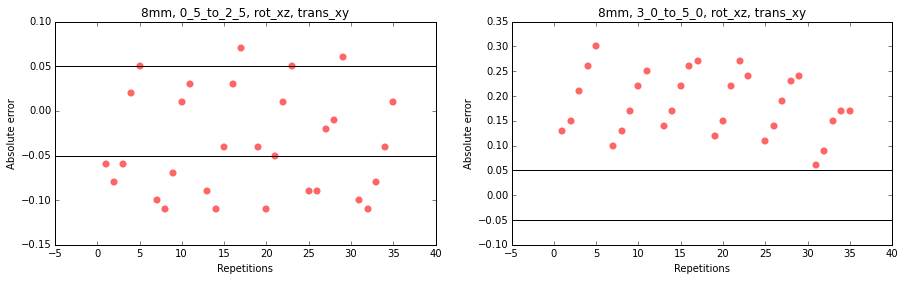

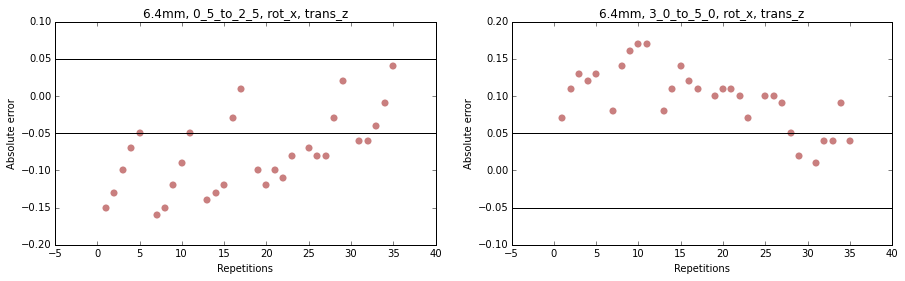

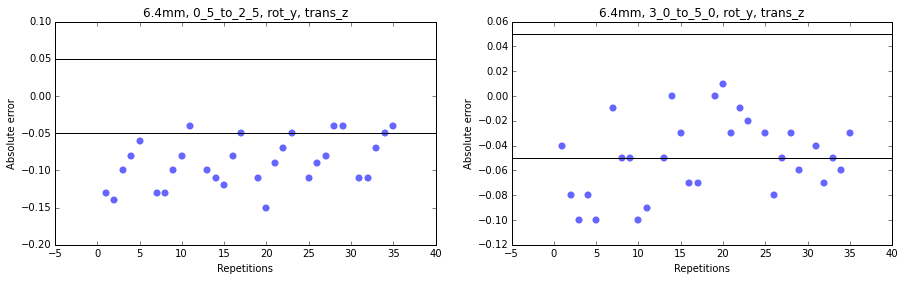

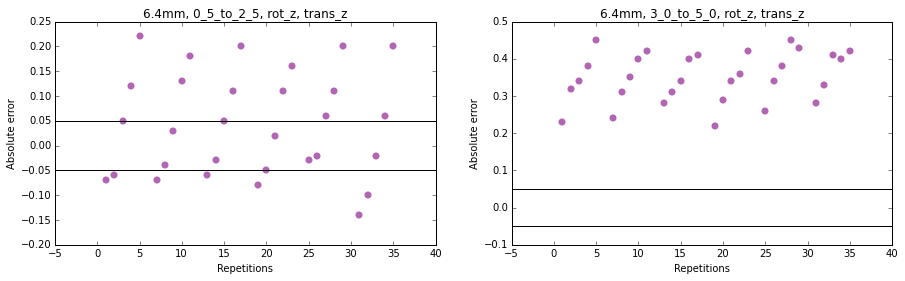

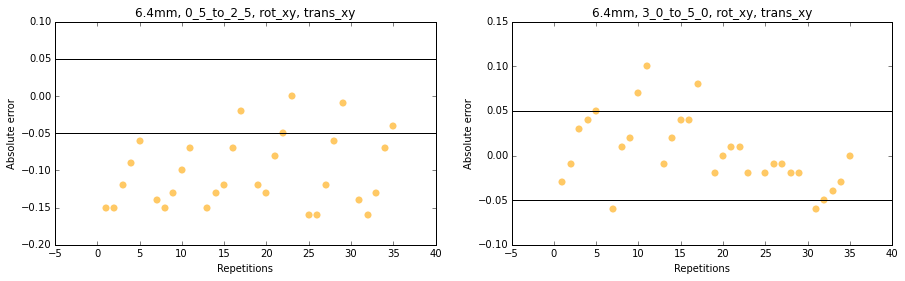

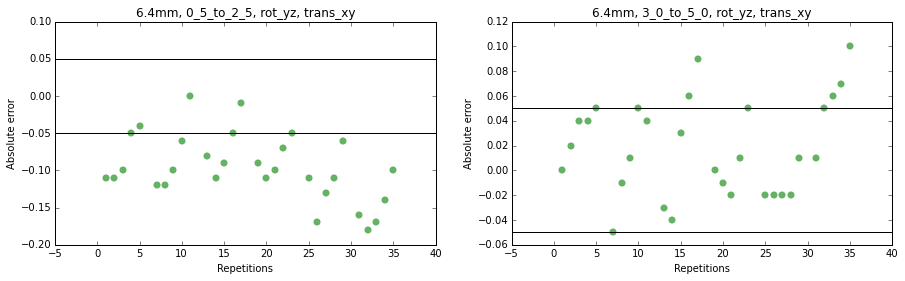

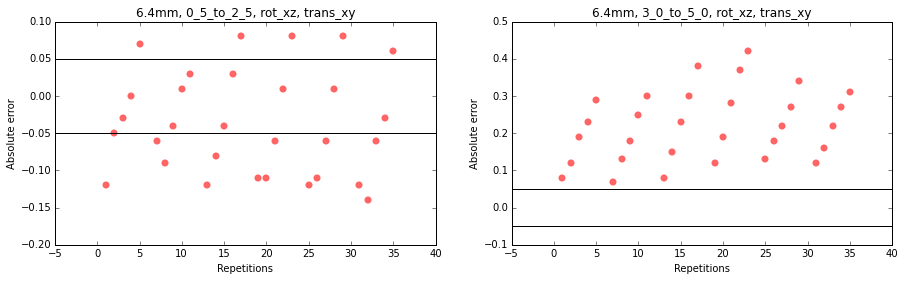

In [93]:
# Error in time for tricubic interpolation
error_in_time(cost_dict_10,'10mm',0.01, ['x','y','z'], ax_to_idx_tricubic)
error_in_time(cost_dict_10_1,'10mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic)

error_in_time(cost_dict_8,'8mm',0.01, ['x','y','z'], ax_to_idx_tricubic)
error_in_time(cost_dict_8_1,'8mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic)

error_in_time(cost_dict_6_4,'6.4mm',0.01, ['x','y','z'], ax_to_idx_tricubic)
error_in_time(cost_dict_6_4_1,'6.4mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic)

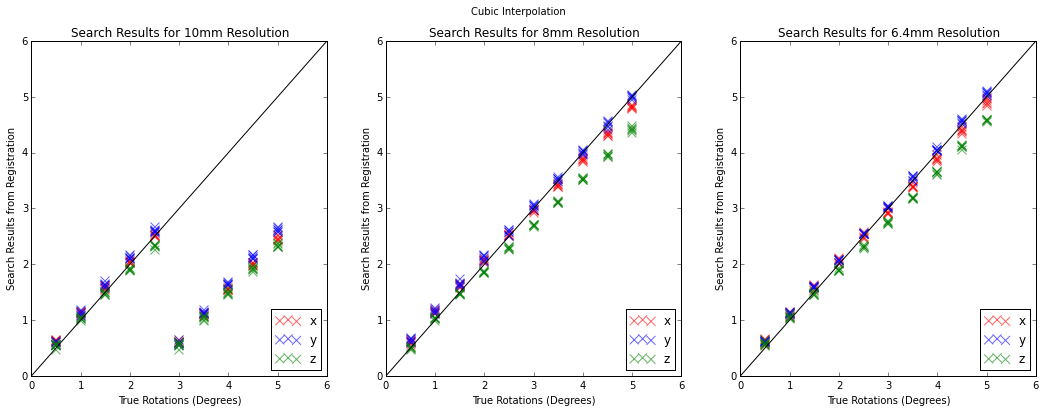

In [9]:
# Bicubic on single axis
#10mm
cost_dict_10 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/sept23_cubic_10_rotation.p','rb'))
# 8mm
cost_dict_8 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/sept23_cubic_8_rotation.p','rb'))
#6.4mm
cost_dict_6_4 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/sept23_cubic_6_4_rotation.p','rb'))

# Scatter Plot
plt.figure(figsize = [18,6])
plt.subplot(1,3,1)
scatter_plot(cost_dict_10,'10mm')
plt.subplot(1,3,2)
scatter_plot(cost_dict_8,'8mm')
plt.subplot(1,3,3)
scatter_plot(cost_dict_6_4,'6.4mm')
plt.suptitle('Cubic Interpolation')
plt.show()

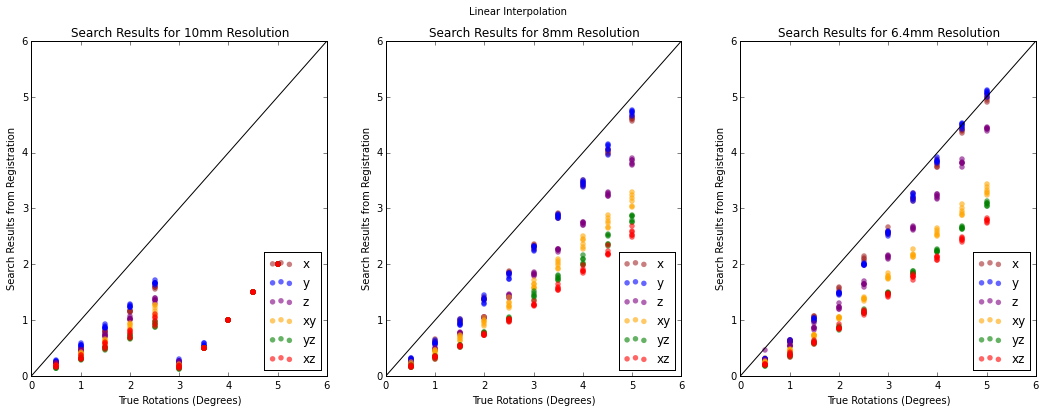

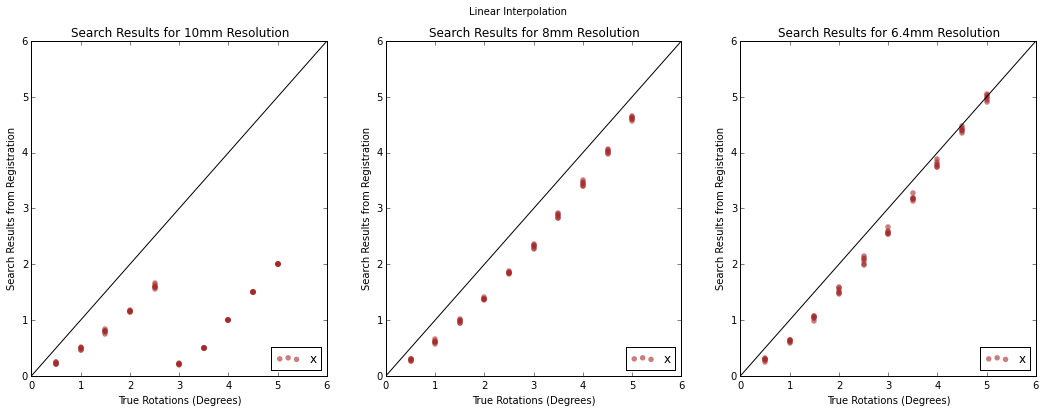

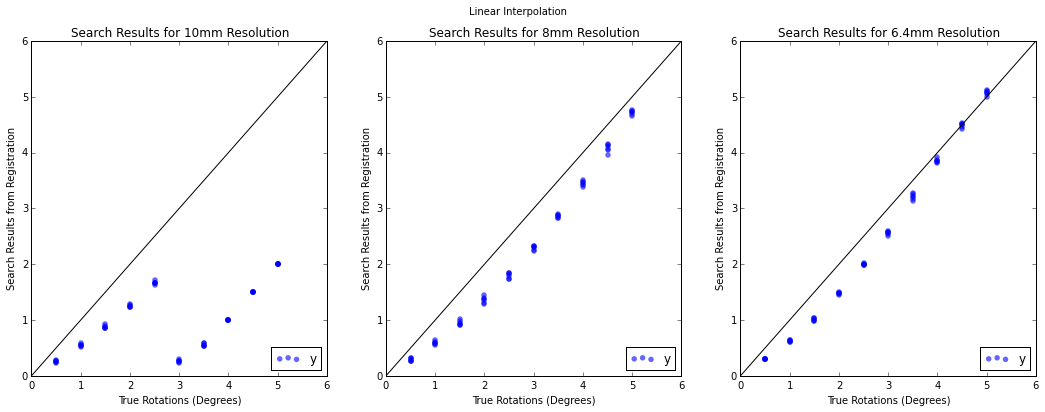

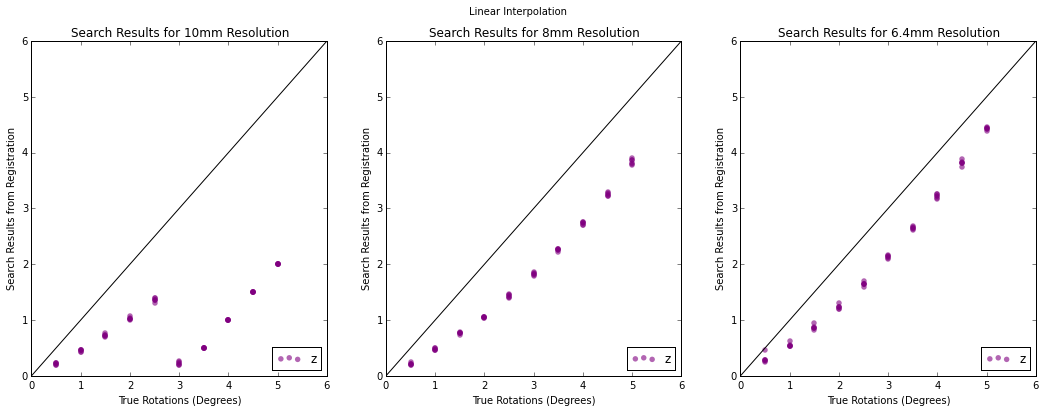

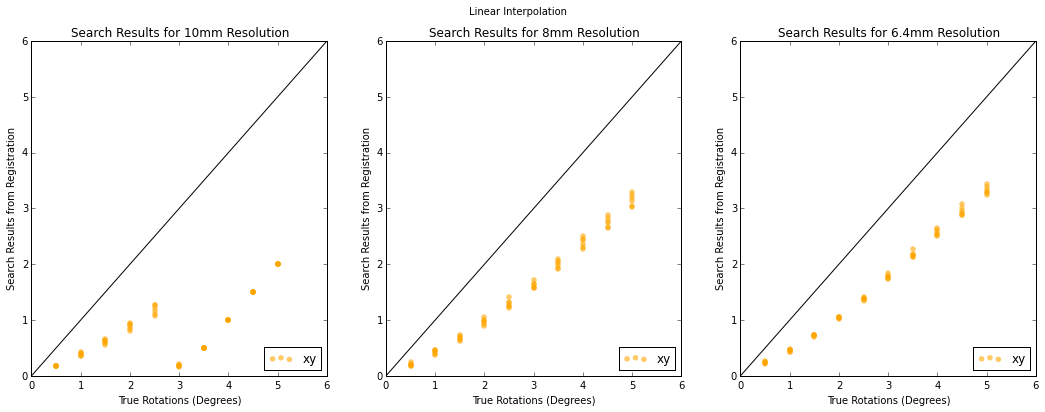

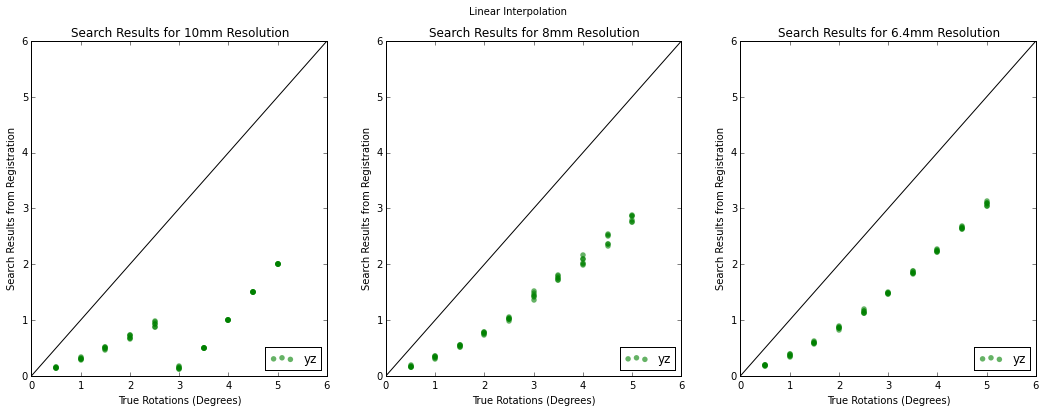

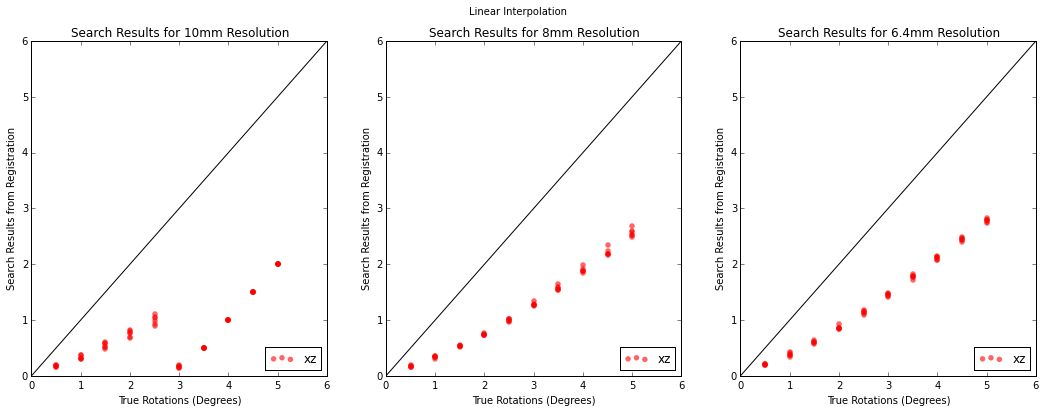

In [10]:
# Trilinear interpolation results
#10mm
cost_dict_10 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/sept23_linear_10_rotation.p','rb'))
# 8mm
cost_dict_8 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/sept23_linear_8_rotation.p','rb'))
#6.4mm
cost_dict_6_4 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/sept23_linear_6_4_rotation.p','rb'))

scatter_plot_all_linear(['x','y','z','xy','yz','xz'], cost_dict_10, cost_dict_8, cost_dict_6_4,[18,6])

for ax in ['x','y','z','xy','yz','xz']:
    axes = [ax]
    scatter_plot_all_linear(axes, cost_dict_10, cost_dict_8, cost_dict_6_4,[18,6])

## Error in Time

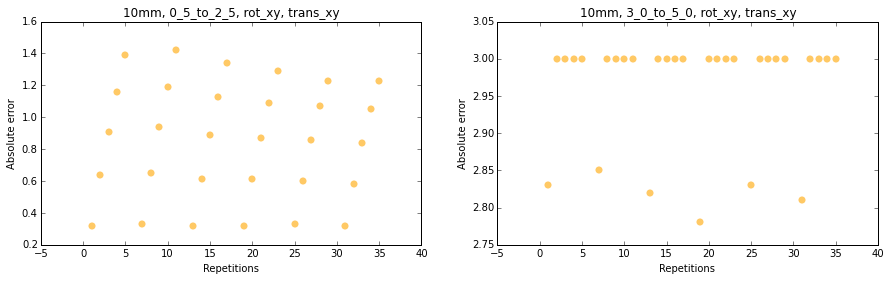

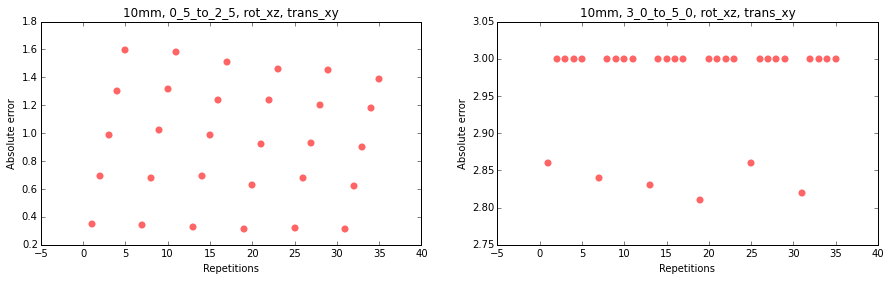

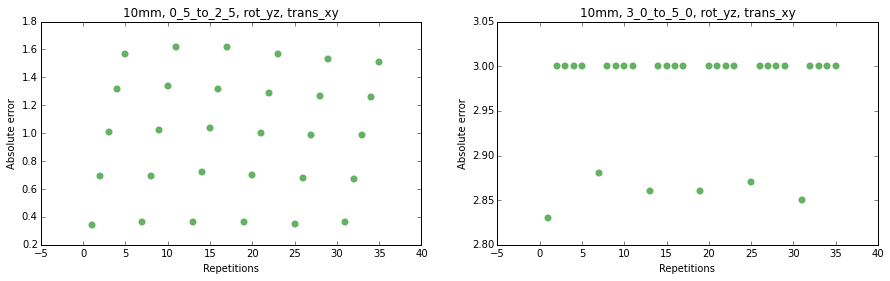

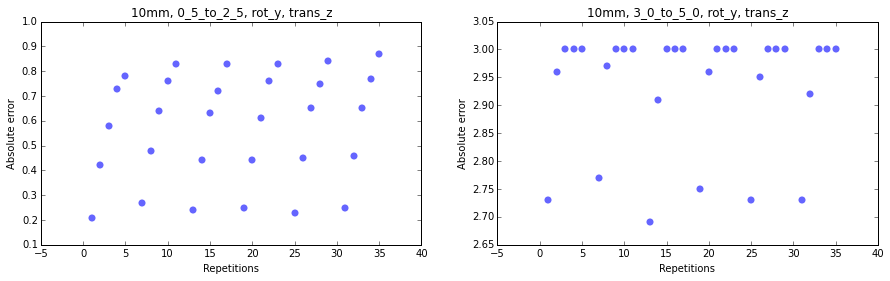

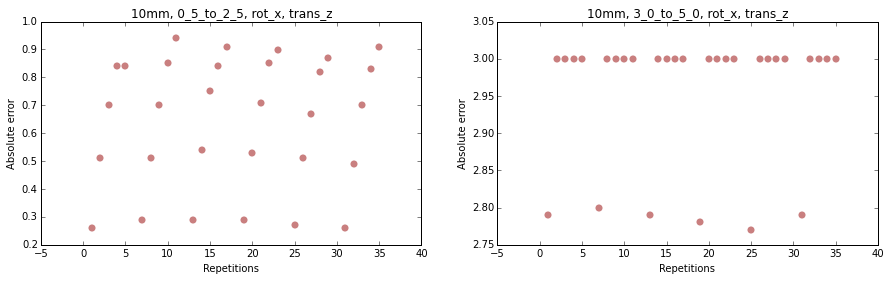

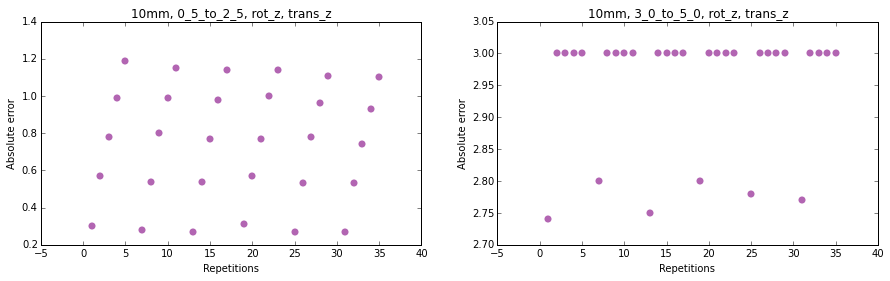

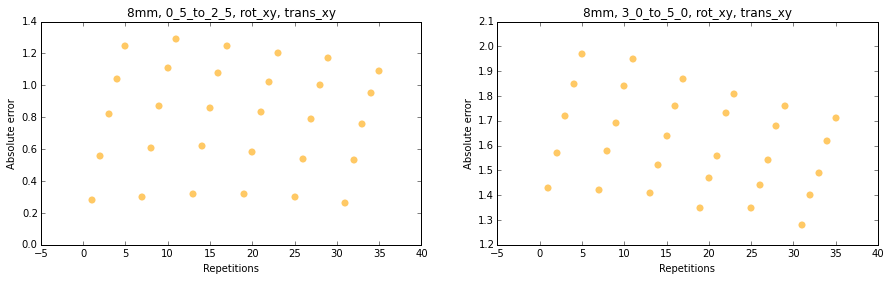

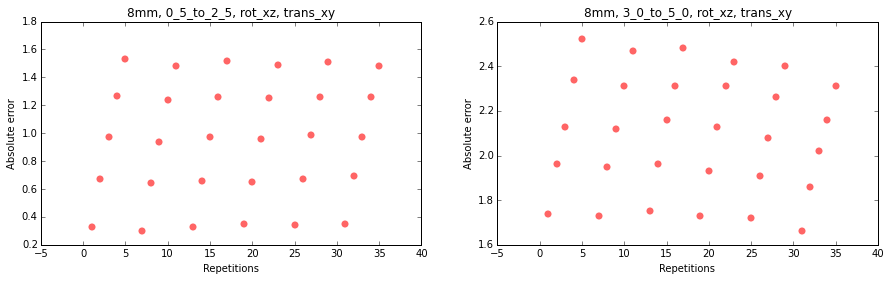

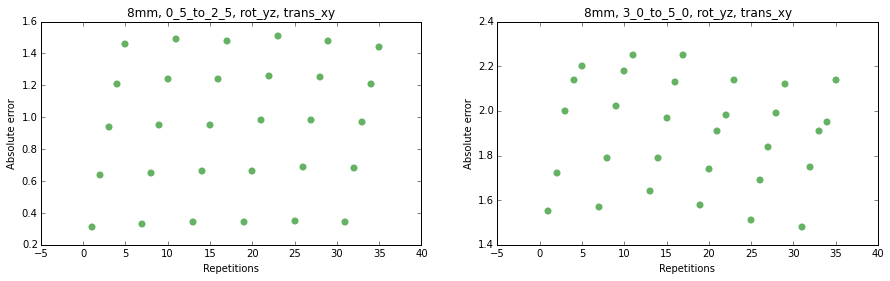

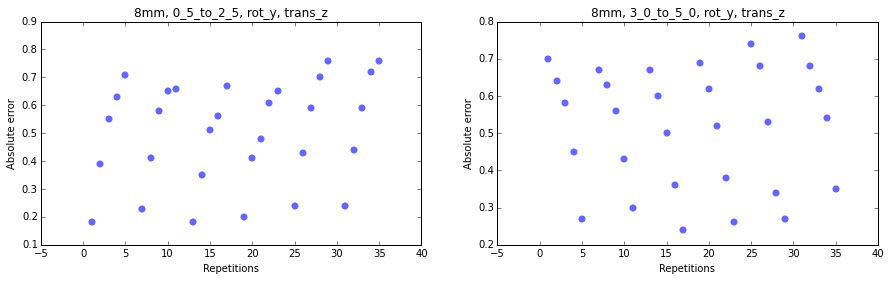

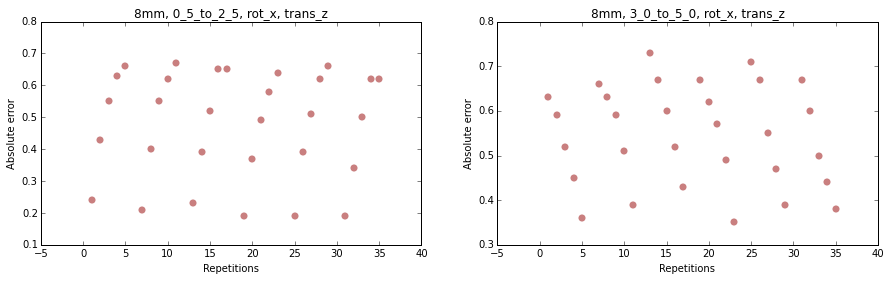

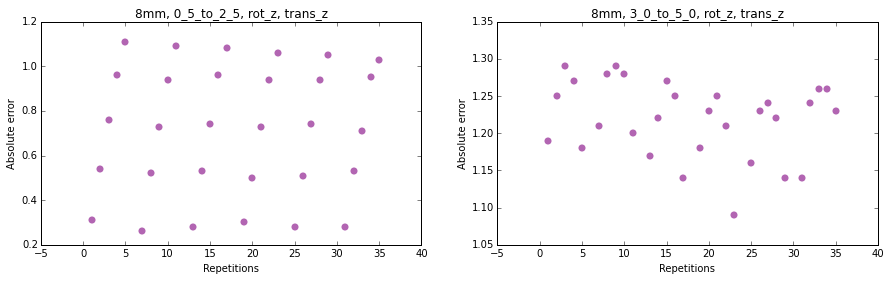

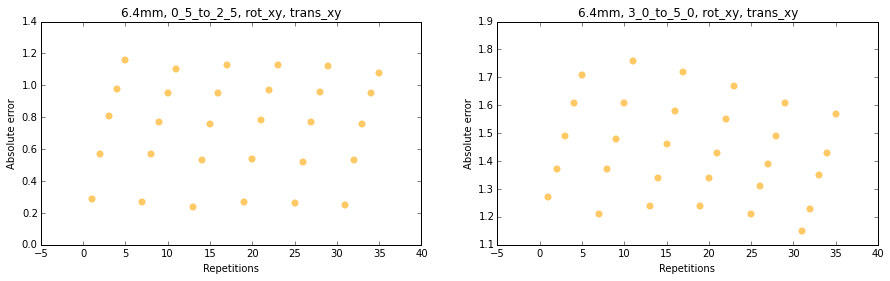

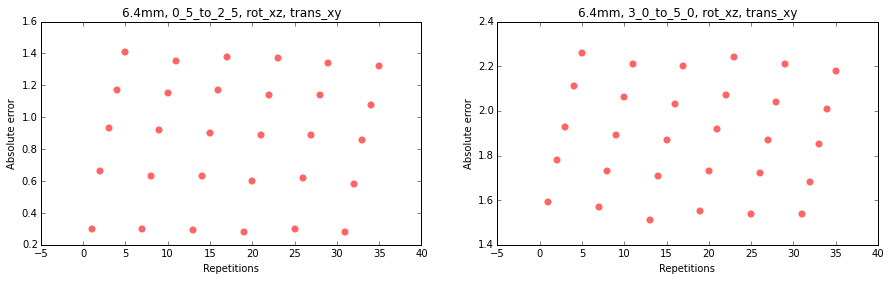

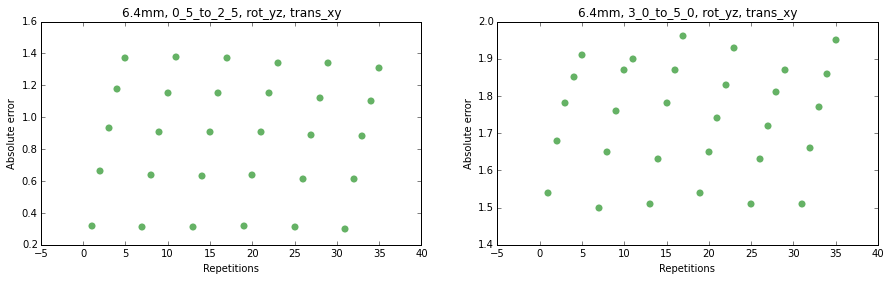

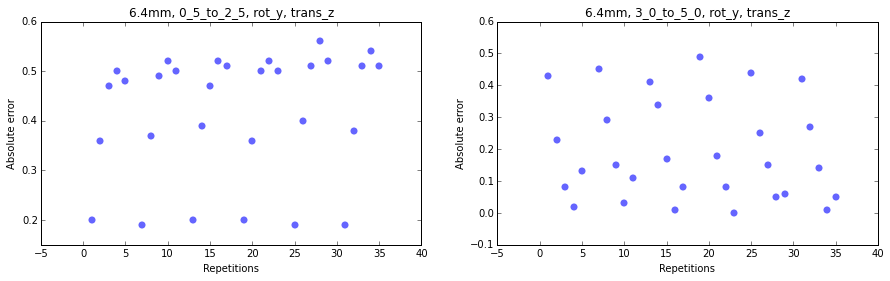

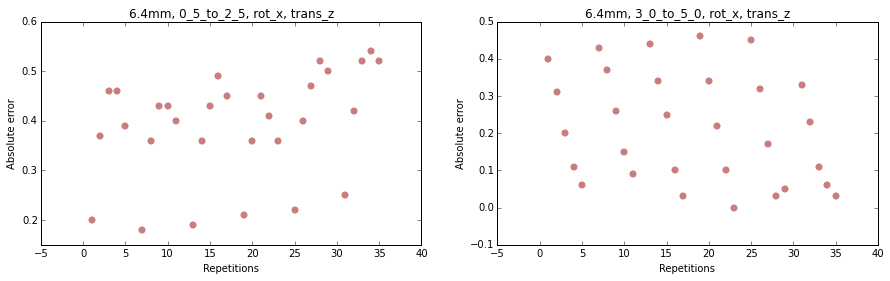

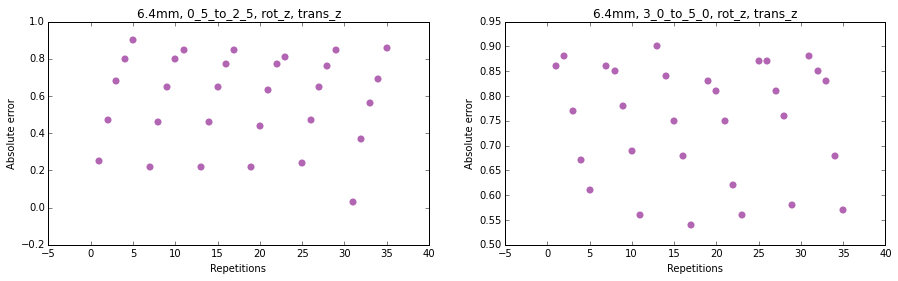

In [11]:
#10mm
cost_dict_10 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/sept23_linear_10_rotation.p','rb'))
# 8mm
cost_dict_8 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/sept23_linear_8_rotation.p','rb'))
#6.4mm
cost_dict_6_4 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/sept23_linear_6_4_rotation.p','rb'))
error_in_time(cost_dict_10,'10mm')
error_in_time(cost_dict_8,'8mm')
error_in_time(cost_dict_6_4,'6.4mm')

# Translations

In [48]:
from sept23_visualize import scatter_plot_all_trans, error_in_time_trans

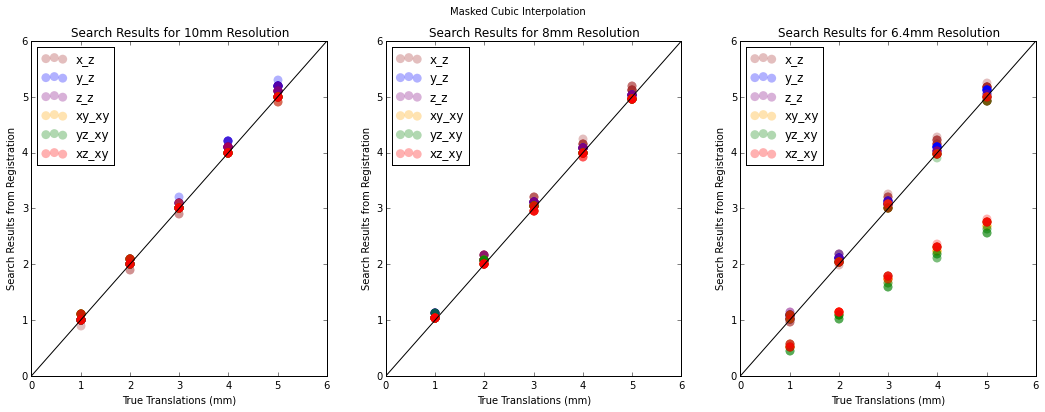

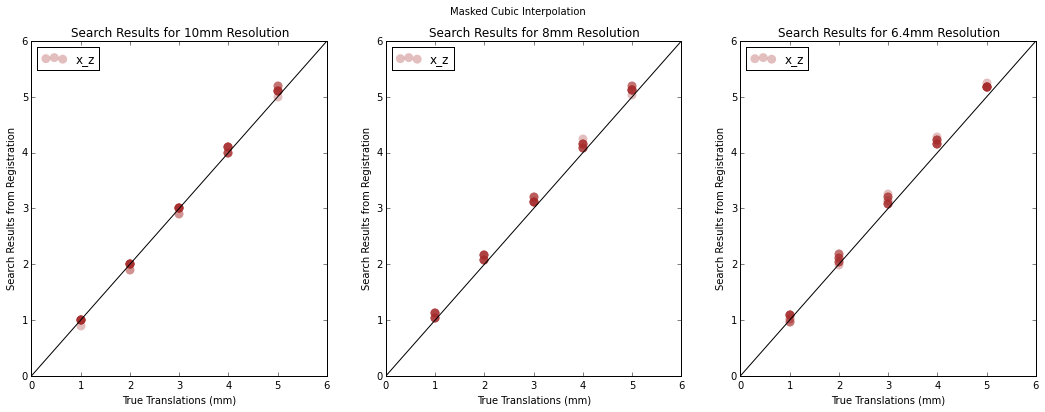

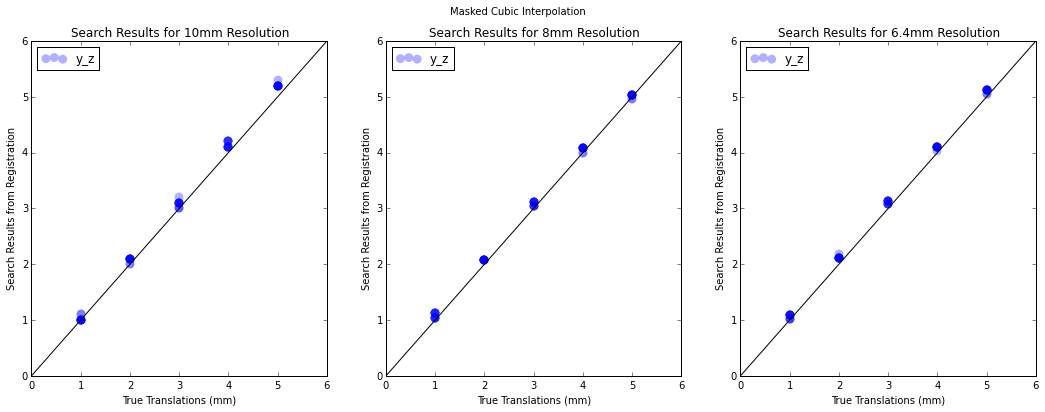

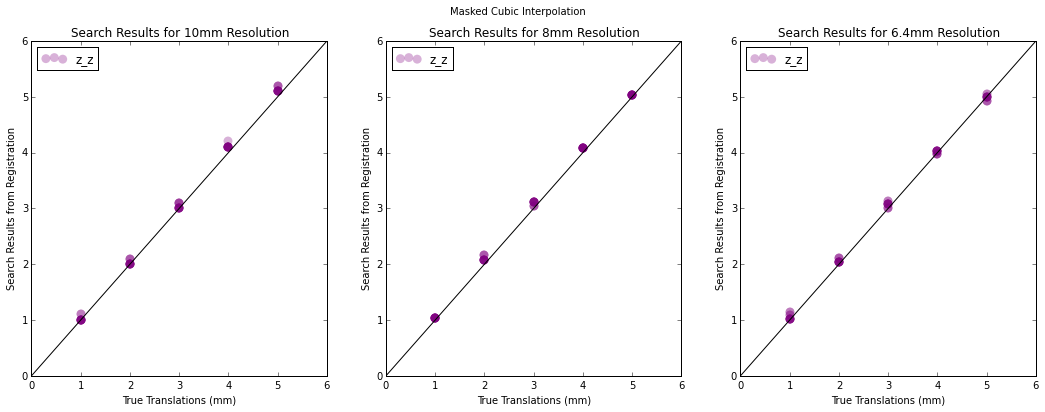

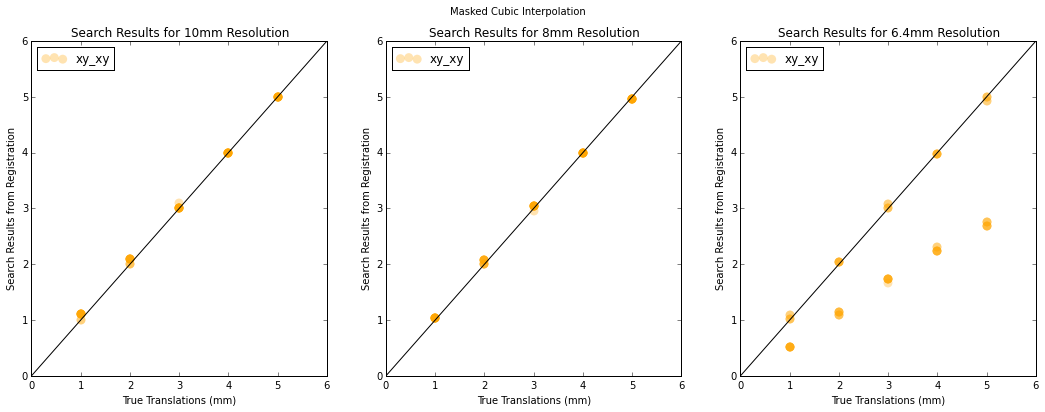

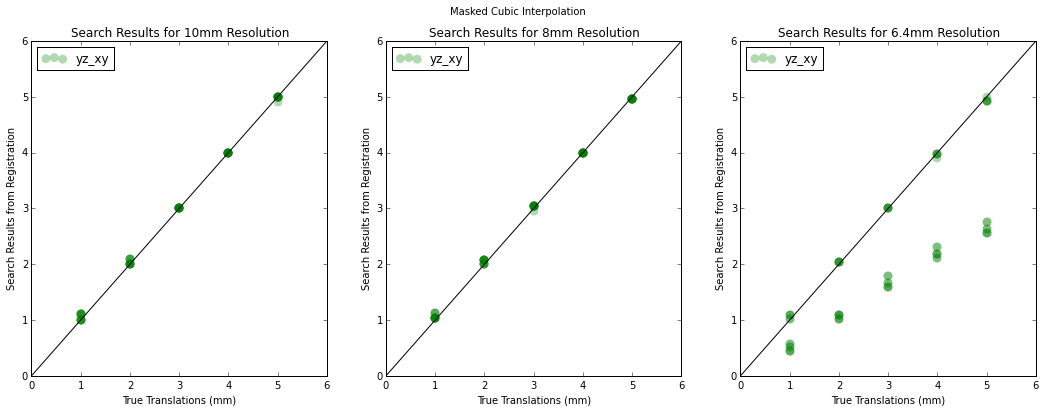

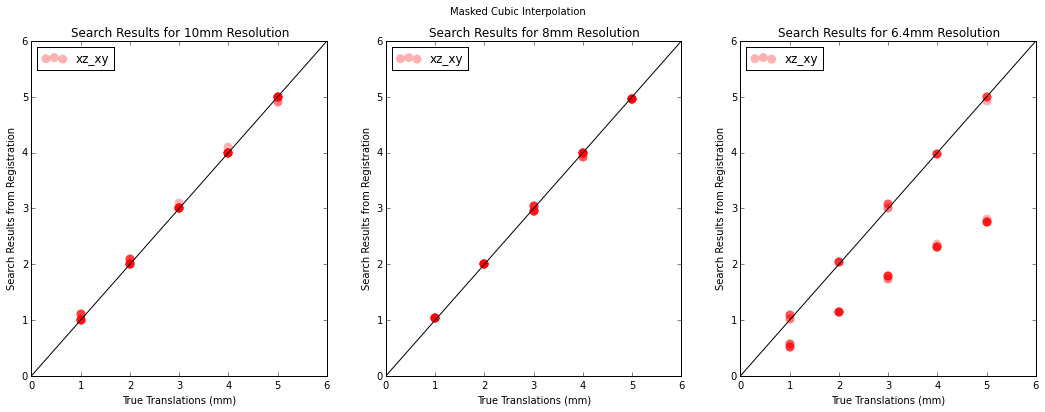

In [58]:
# Cubic With Mask
#10mm
cost_dict_10 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/sept23_cost_trans_order3_10_masked.p','rb'))
# 8mm
cost_dict_8 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/sept23_cost_trans_order3_8_masked.p','rb'))
#6.4mm
cost_dict_6_4 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/sept23_cost_trans_order3_6_4_masked.p','rb'))

# Scatter Plot
scatter_plot_all_trans(['x','y','z','xy','yz','xz'], cost_dict_10, cost_dict_8, cost_dict_6_4, [18,6],interp = 'Masked Cubic')

for ax in ['x','y','z','xy','yz','xz']:
    axes = [ax]
    scatter_plot_all_trans(axes, cost_dict_10, cost_dict_8, cost_dict_6_4, [18,6],interp='Masked Cubic')

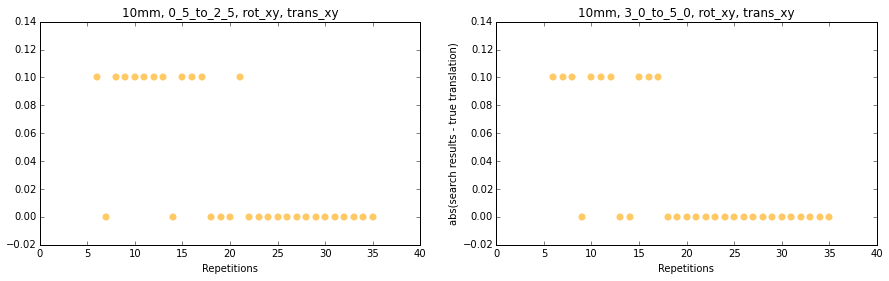

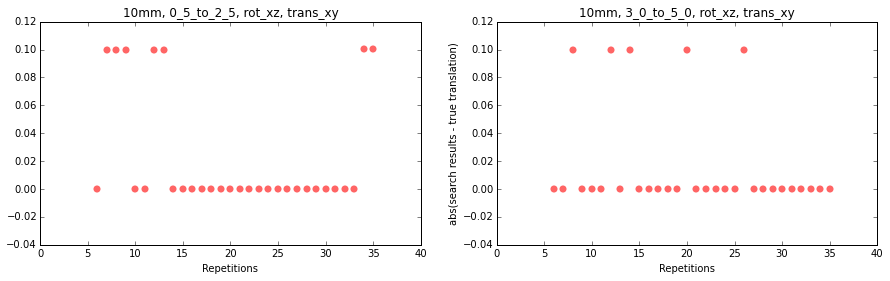

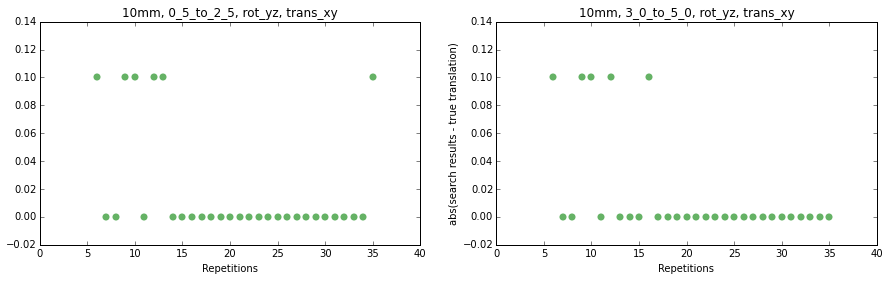

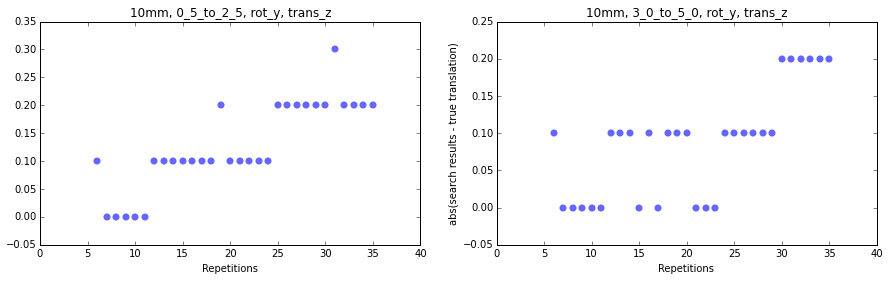

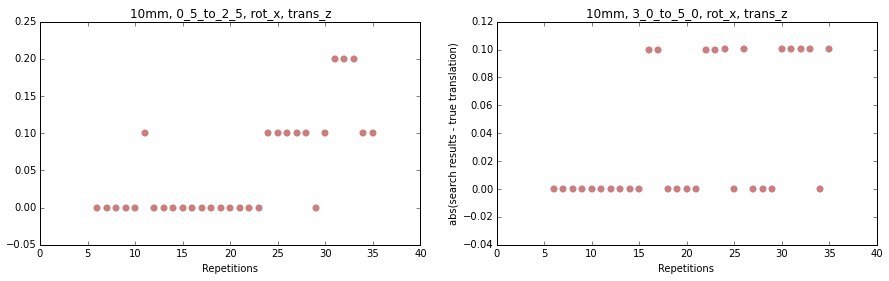

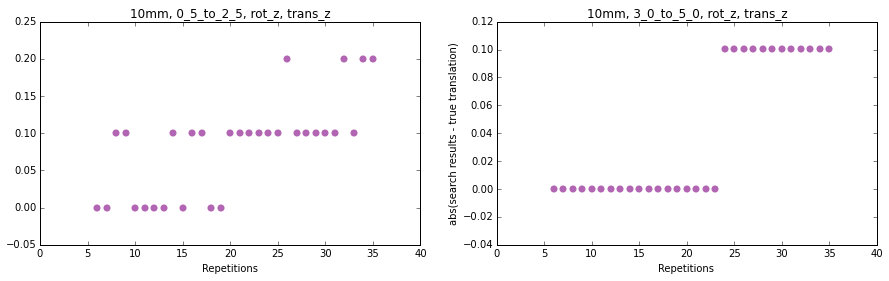

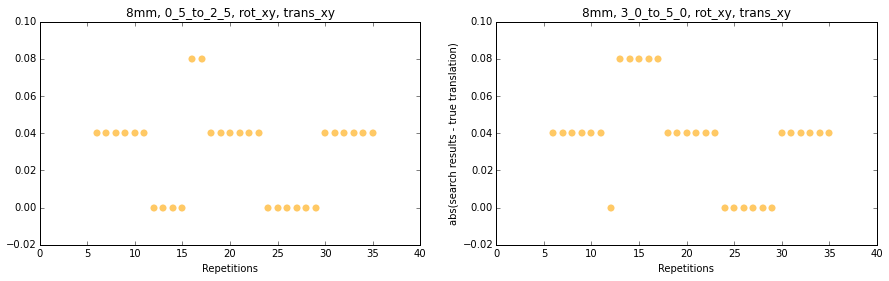

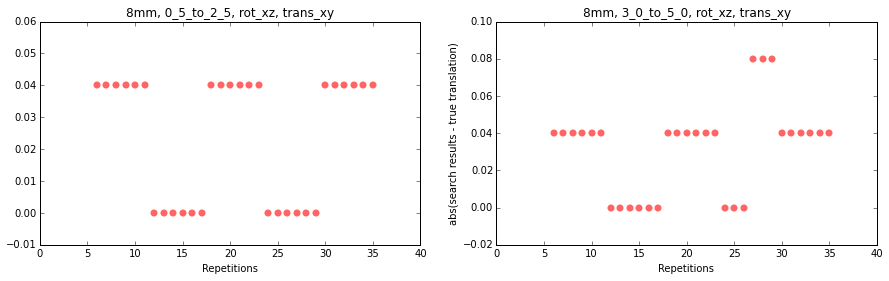

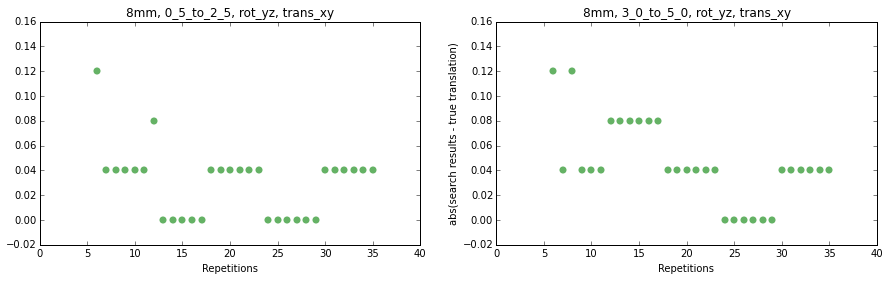

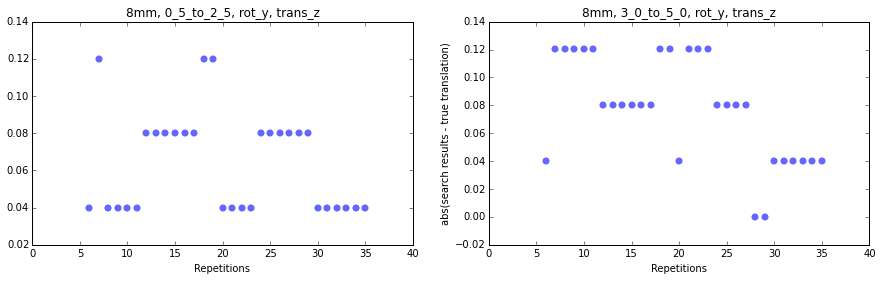

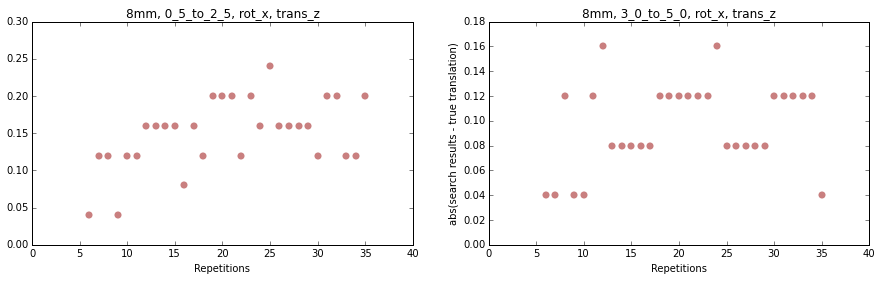

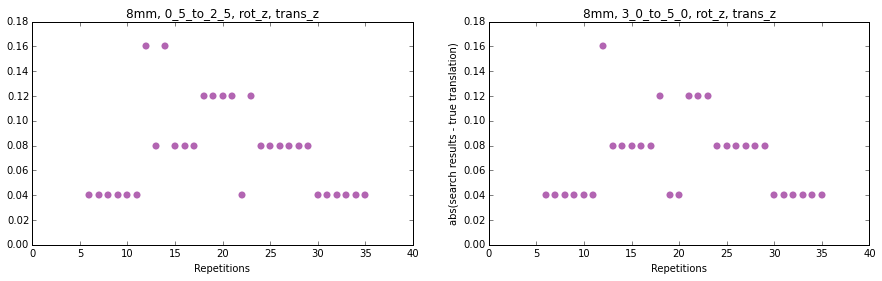

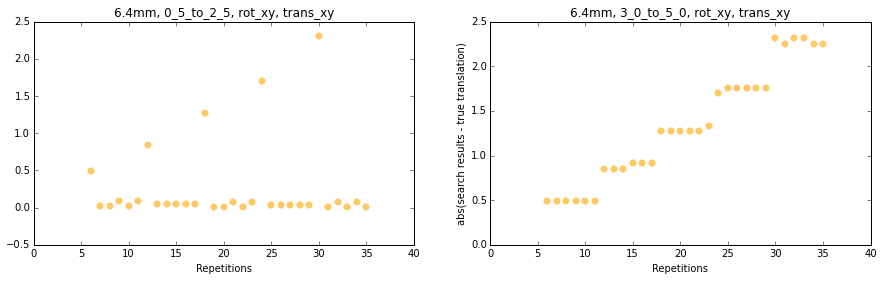

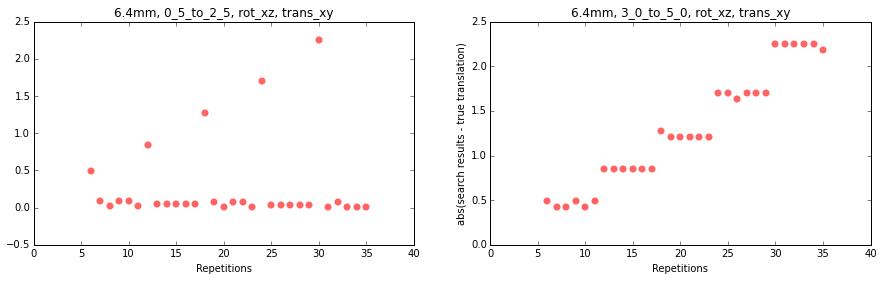

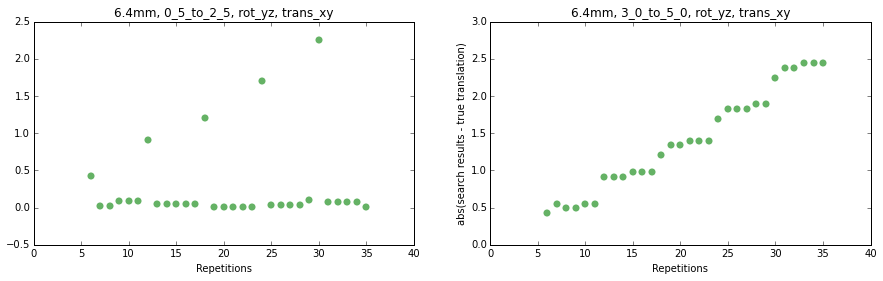

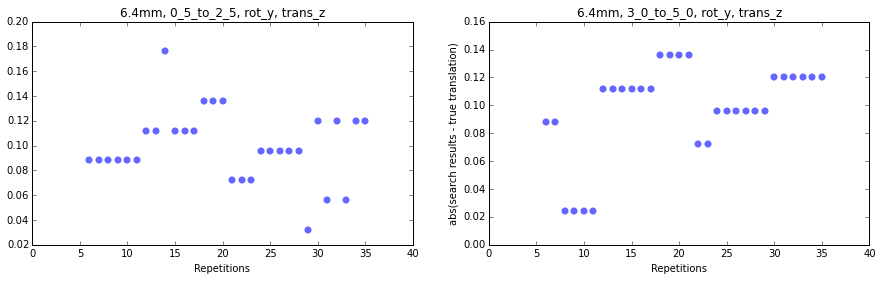

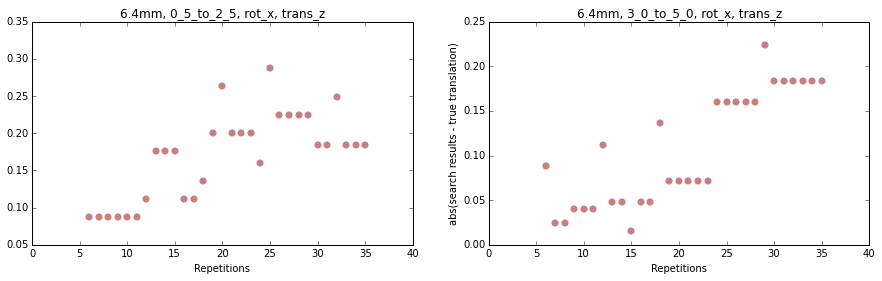

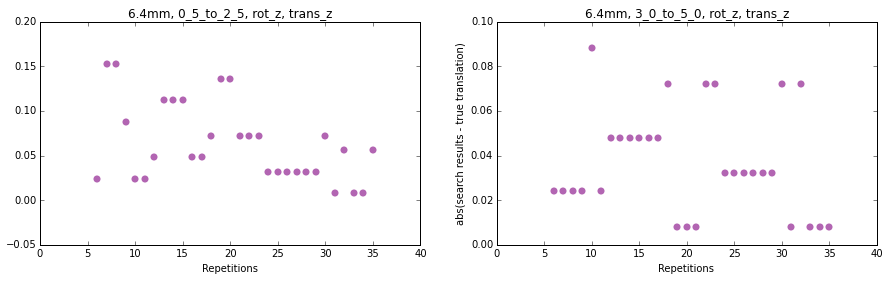

In [59]:
# Linear No Mask, Errors
error_in_time_trans(cost_dict_10,'10mm')
error_in_time_trans(cost_dict_8,'8mm')
error_in_time_trans(cost_dict_6_4,'6.4mm')

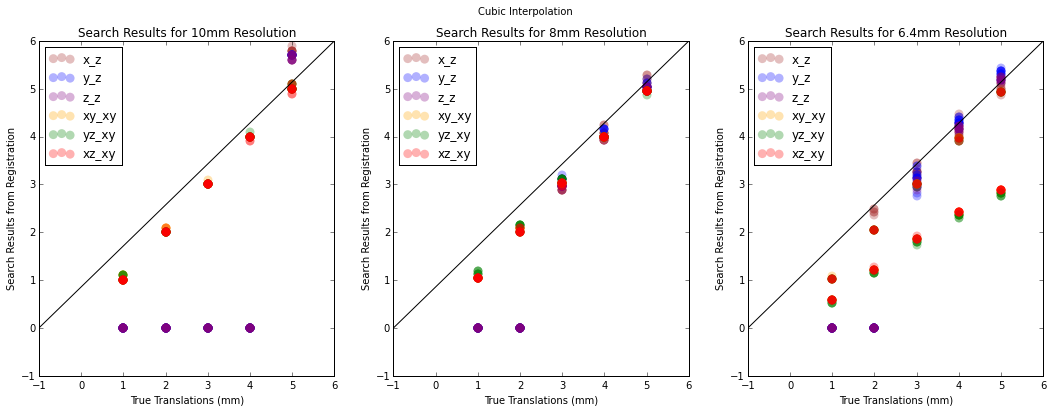

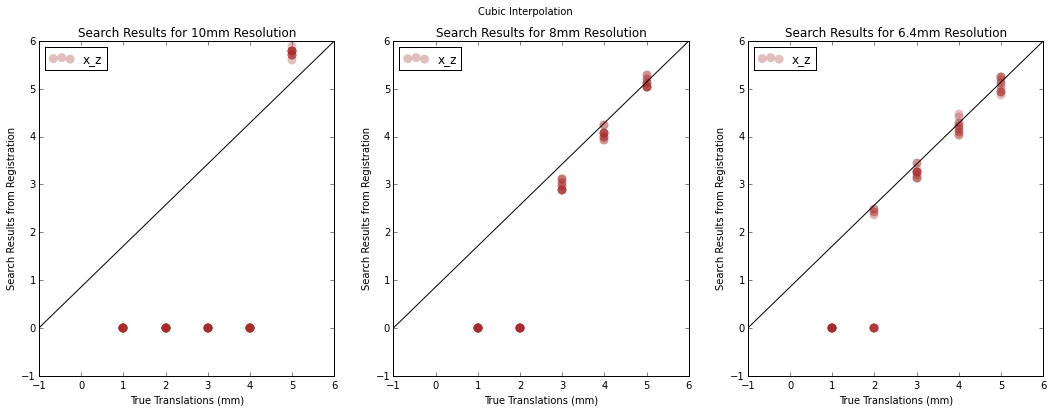

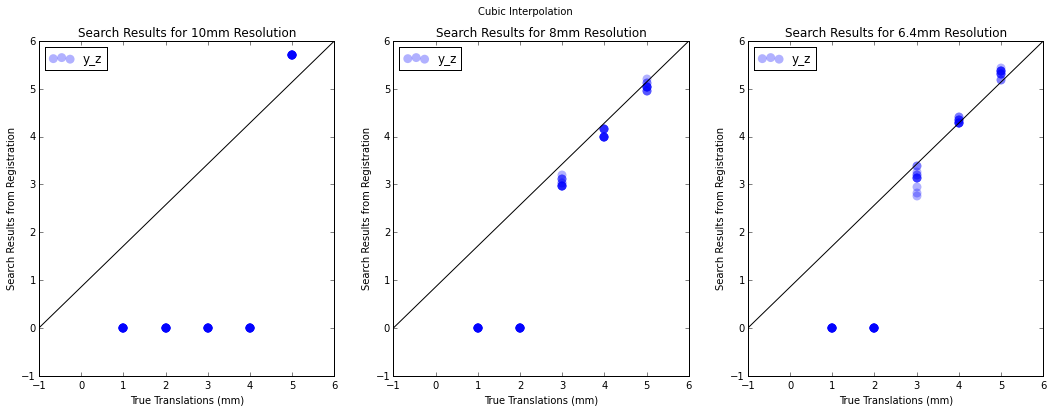

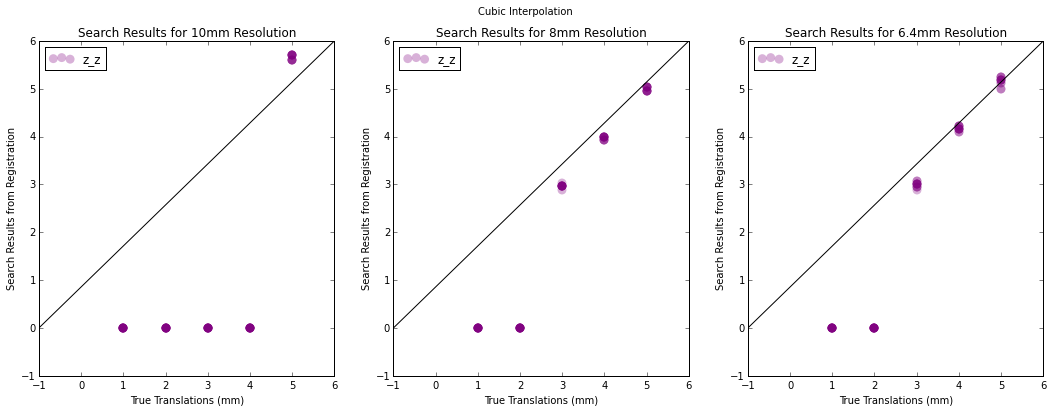

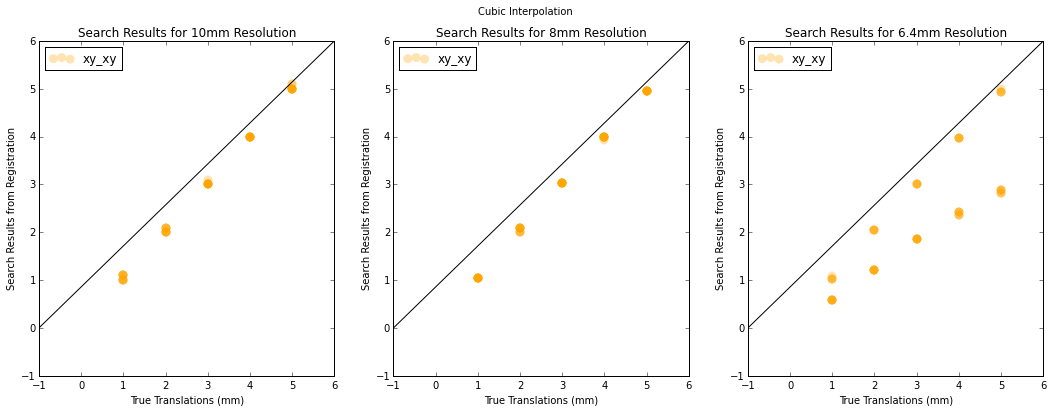

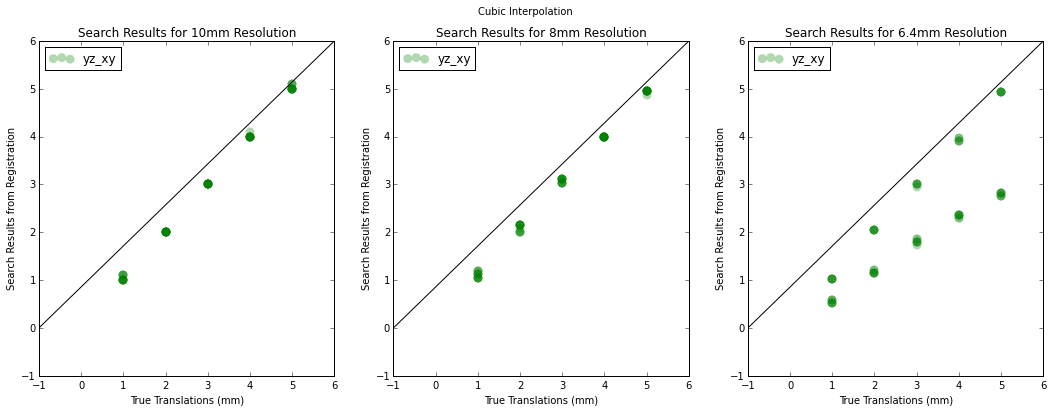

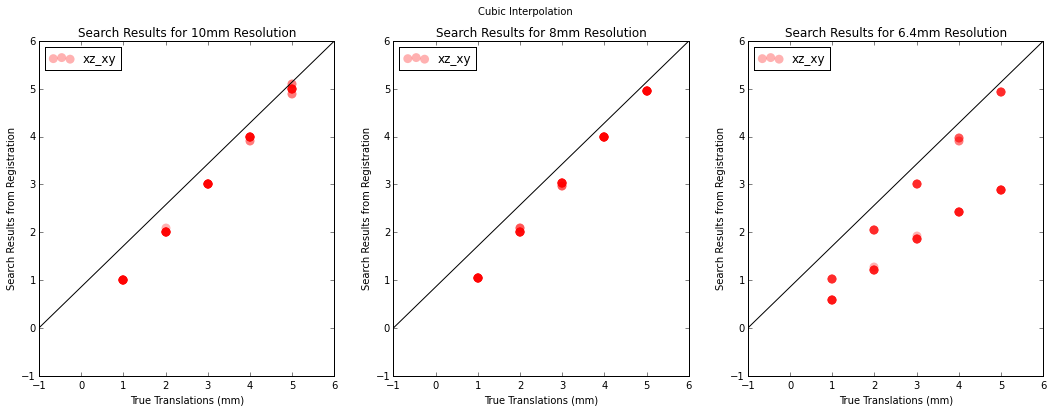

In [51]:
# Cubic No Mask
#10mm
cost_dict_10 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/cost_trans_linear3_10_.p','rb'))
# 8mm
cost_dict_8 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/cost_trans_linear3_8_.p','rb'))
#6.4mm
cost_dict_6_4 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/cost_trans_linear3_6_4_.p','rb'))

# Scatter Plot
scatter_plot_all_trans(['x','y','z','xy','yz','xz'], cost_dict_10, cost_dict_8, cost_dict_6_4, [18,6],interp = 'Cubic')

for ax in ['x','y','z','xy','yz','xz']:
    axes = [ax]
    scatter_plot_all_trans(axes, cost_dict_10, cost_dict_8, cost_dict_6_4, [18,6],interp='Cubic')

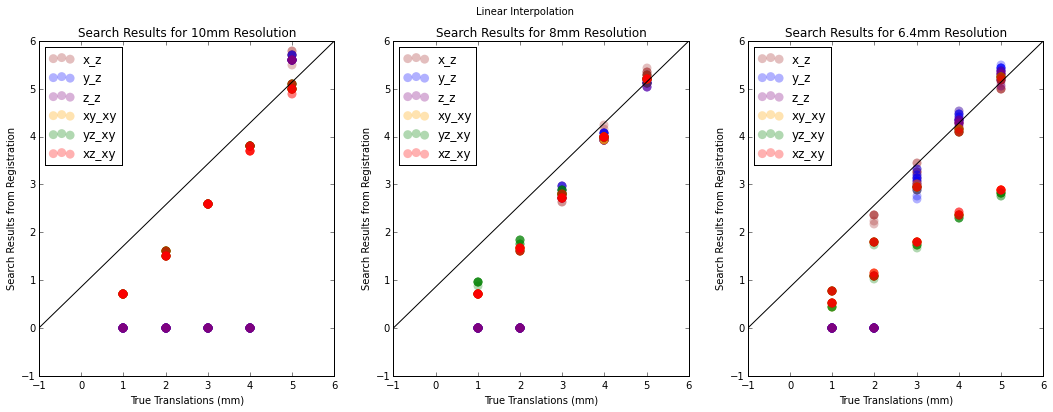

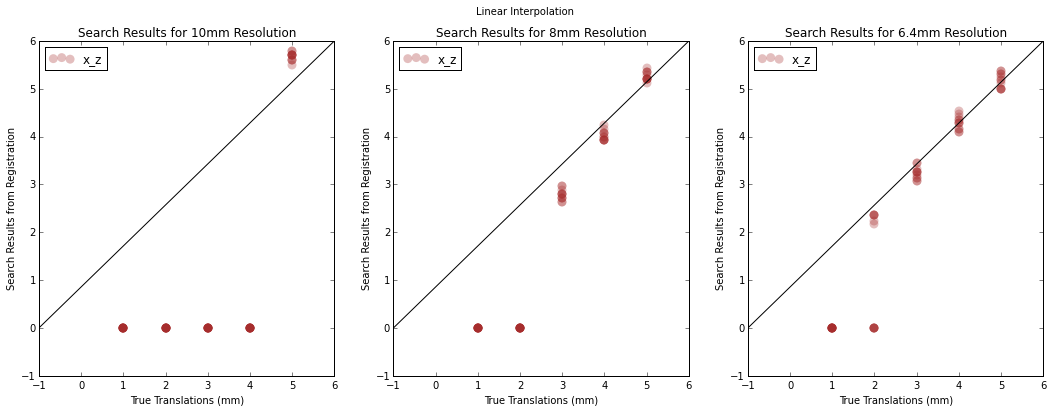

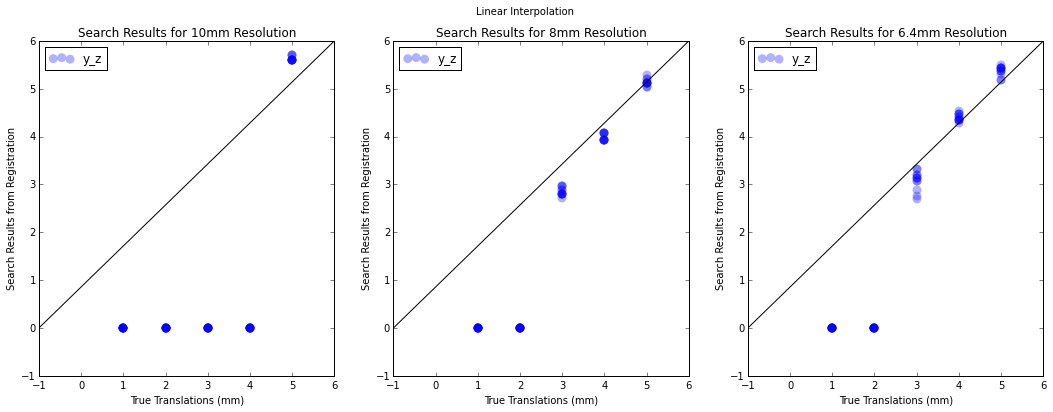

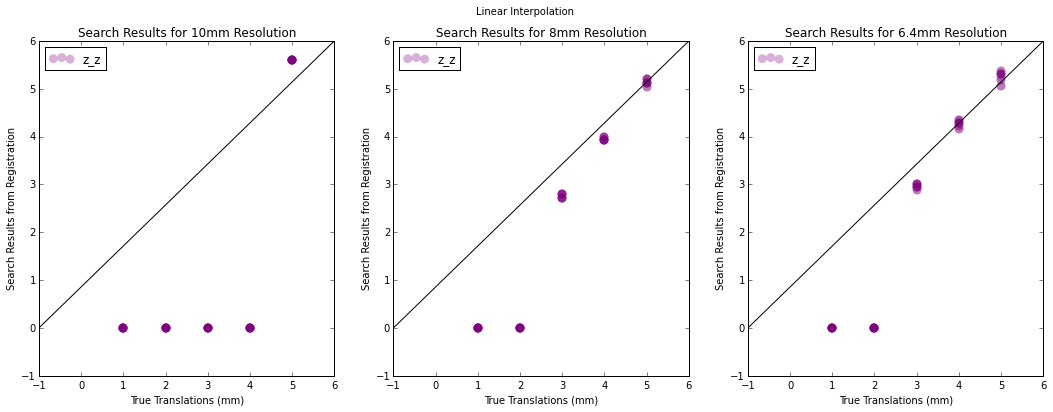

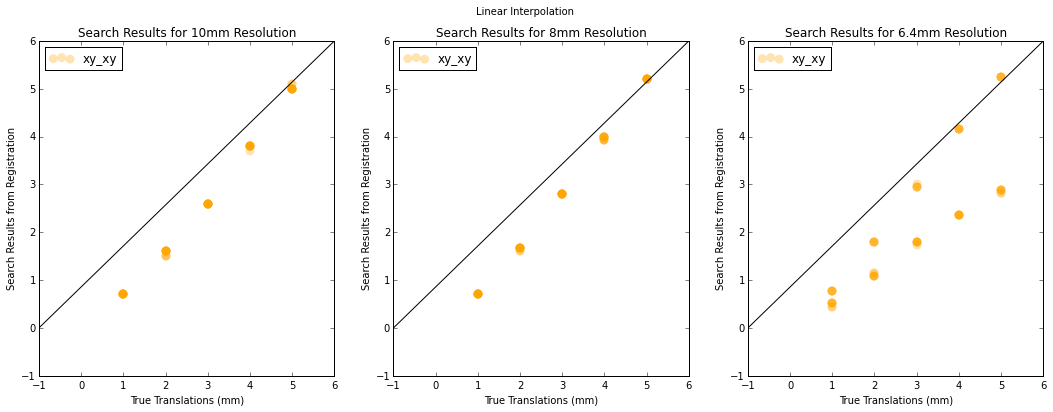

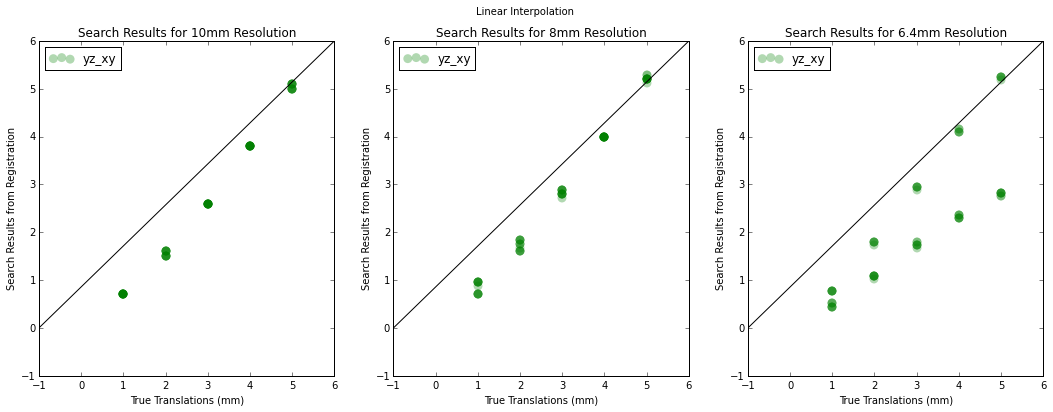

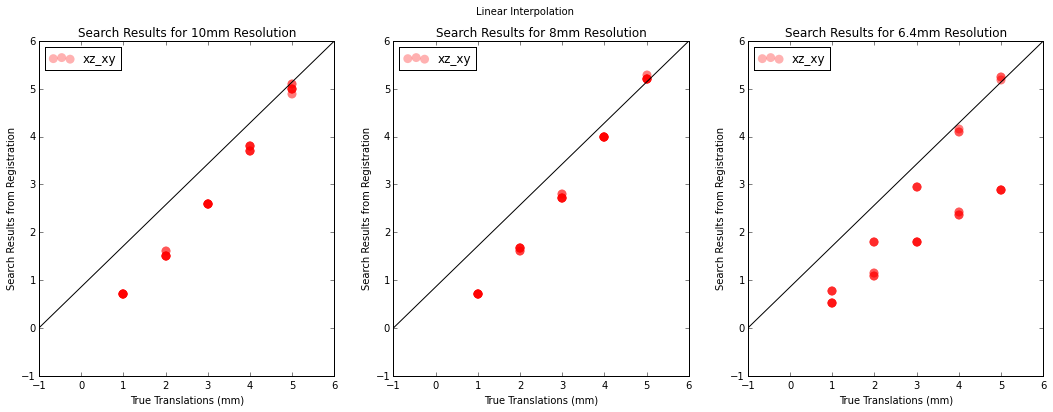

In [49]:
# Linear No Mask
#10mm
cost_dict_10 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/cost_trans_linear1_10_.p','rb'))
# 8mm
cost_dict_8 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/cost_trans_linear1_8_.p','rb'))
#6.4mm
cost_dict_6_4 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/cost_trans_linear1_6_4_.p','rb'))

# Scatter Plot
scatter_plot_all_trans(['x','y','z','xy','yz','xz'], cost_dict_10, cost_dict_8, cost_dict_6_4, [18,6])

for ax in ['x','y','z','xy','yz','xz']:
    axes = [ax]
    scatter_plot_all_trans(axes, cost_dict_10, cost_dict_8, cost_dict_6_4, [18,6])

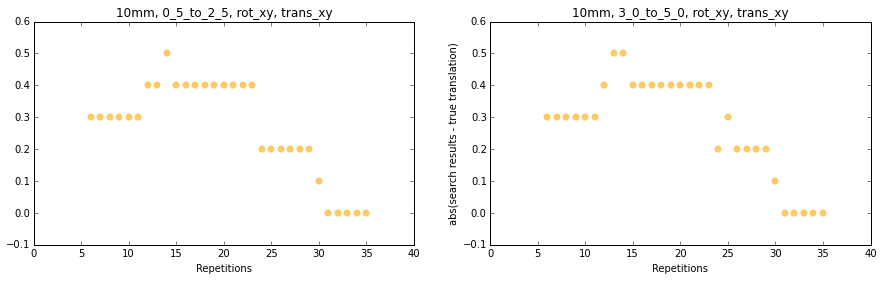

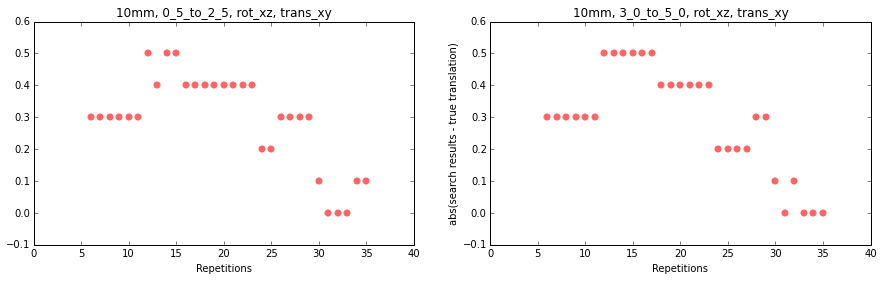

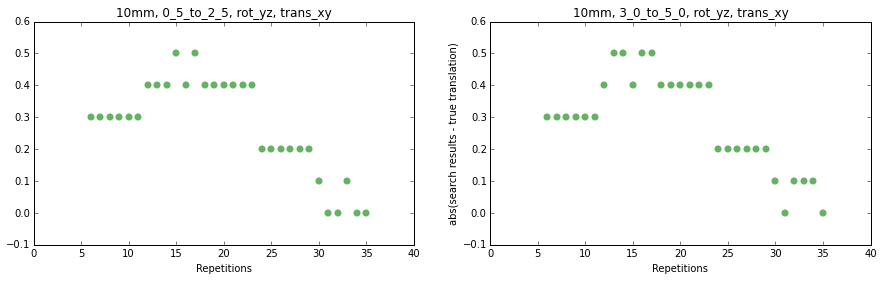

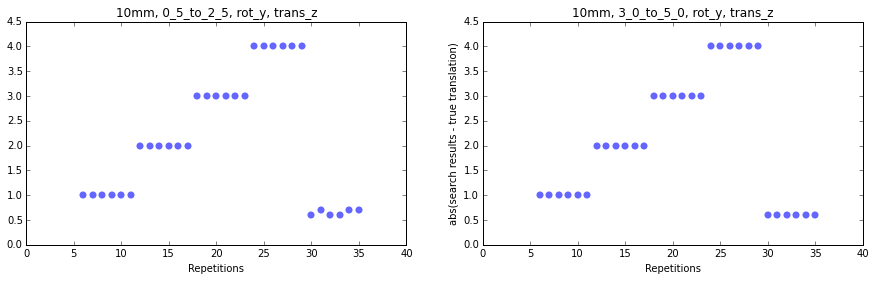

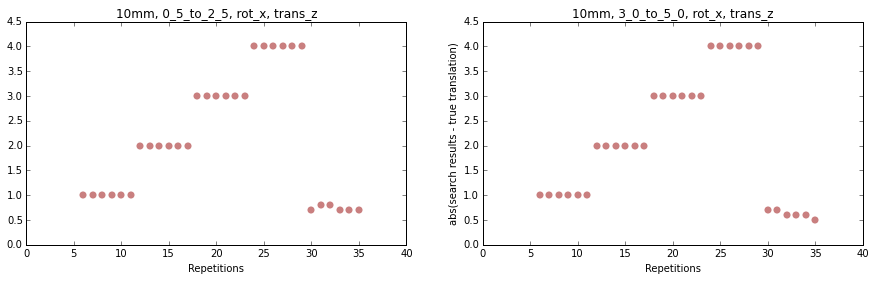

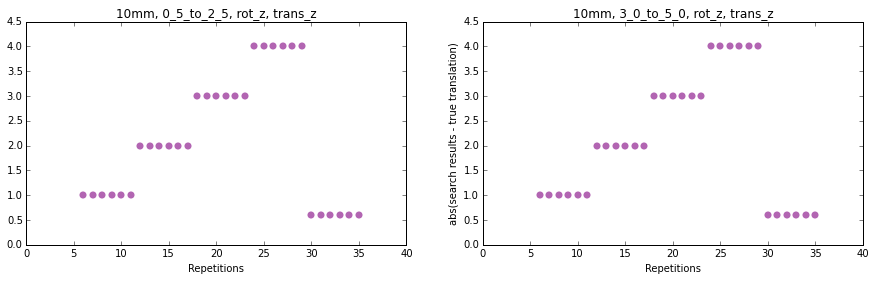

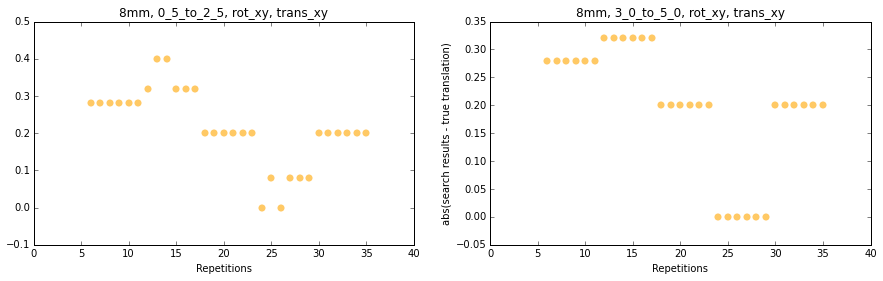

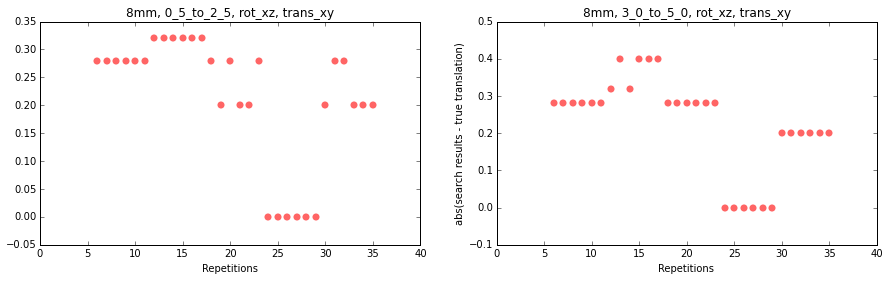

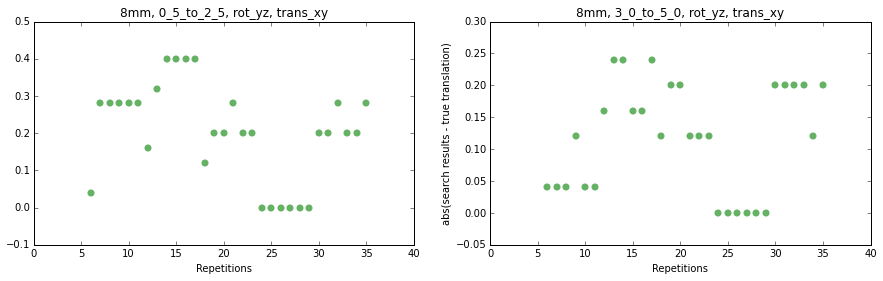

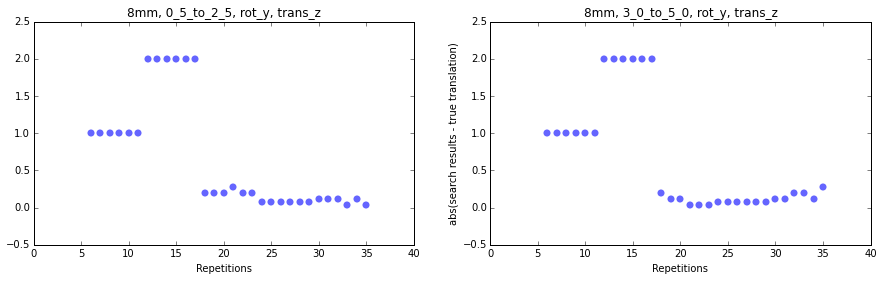

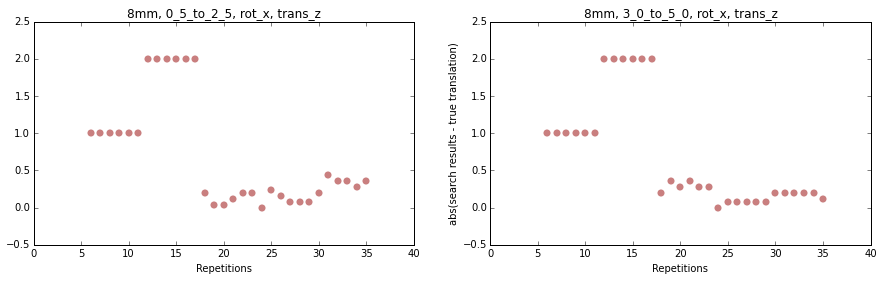

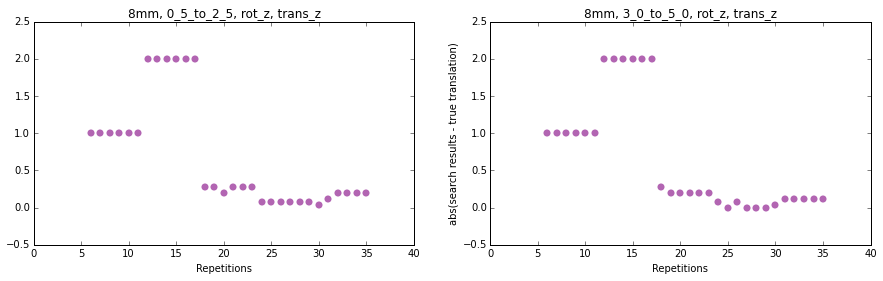

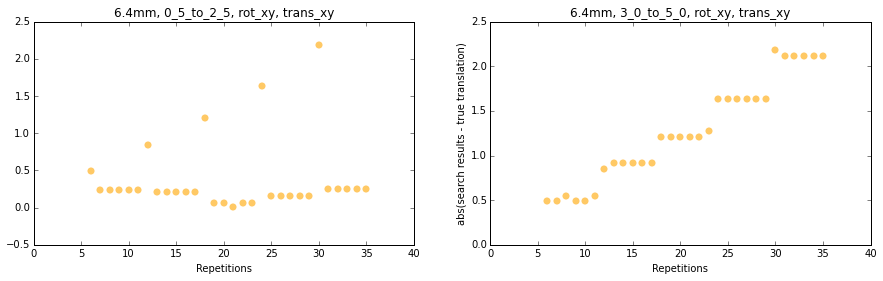

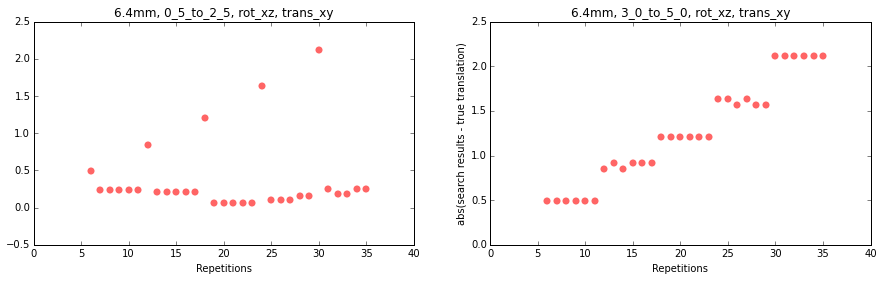

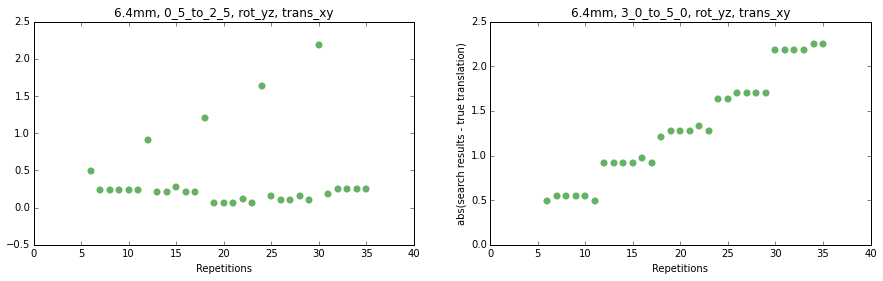

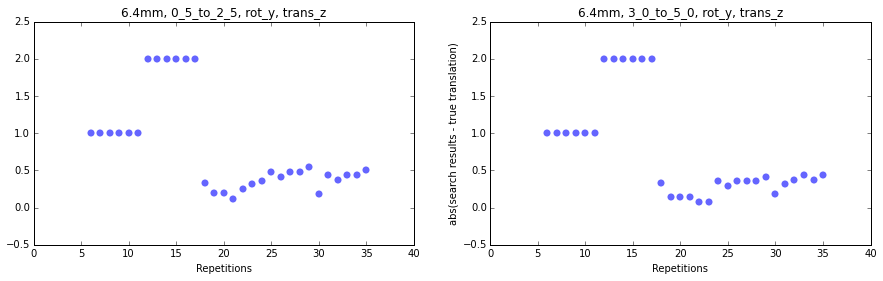

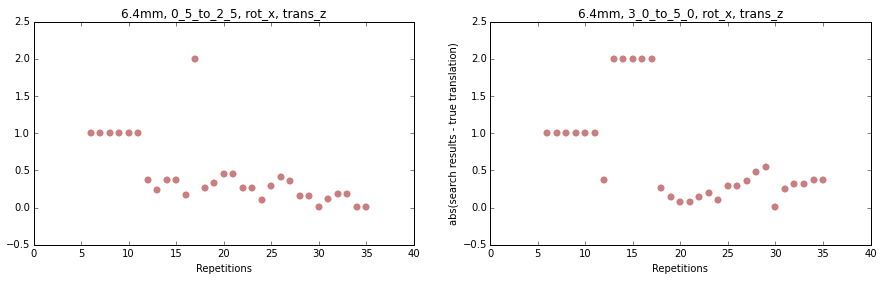

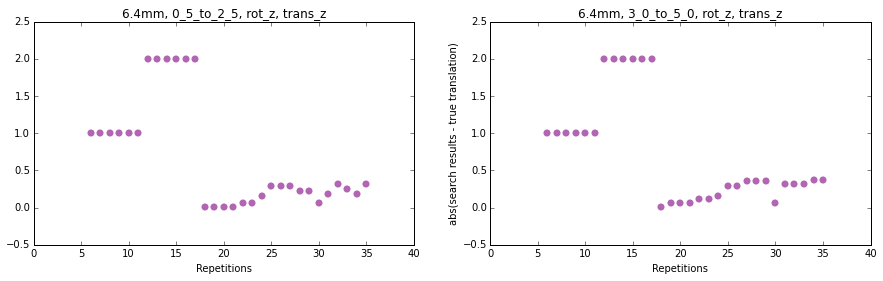

In [50]:
# Linear No Mask, Errors
error_in_time_trans(cost_dict_10,'10mm')
error_in_time_trans(cost_dict_8,'8mm')
error_in_time_trans(cost_dict_6_4,'6.4mm')

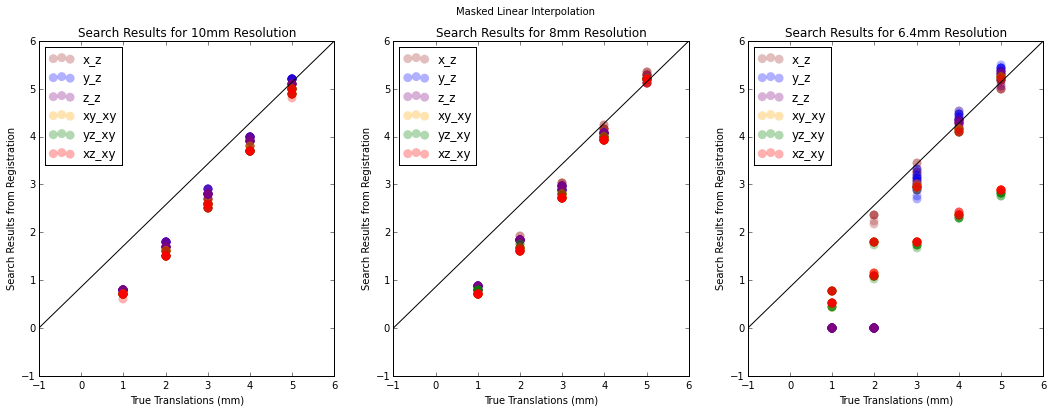

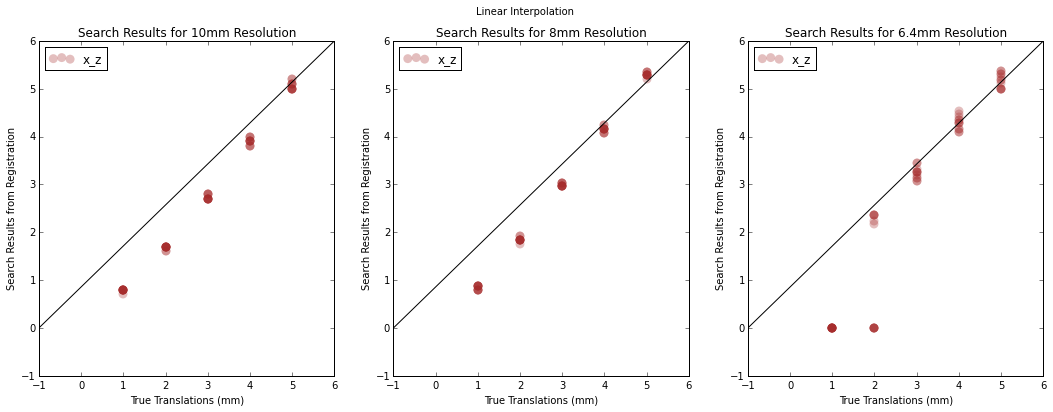

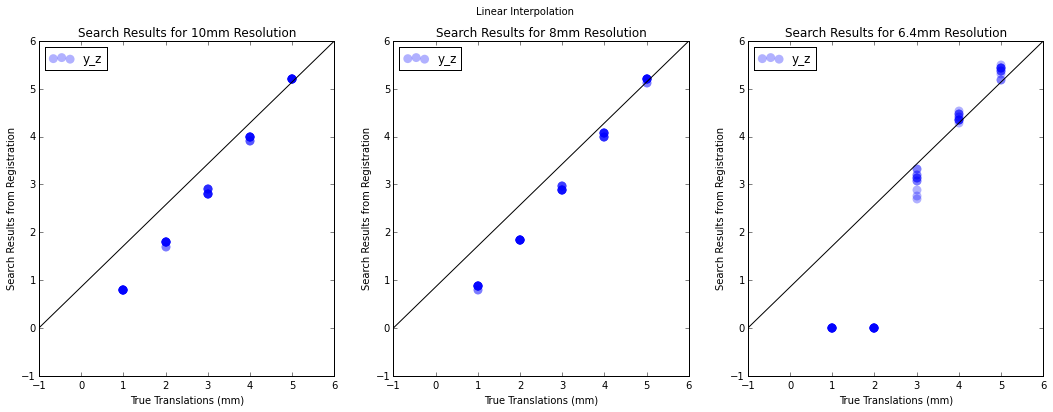

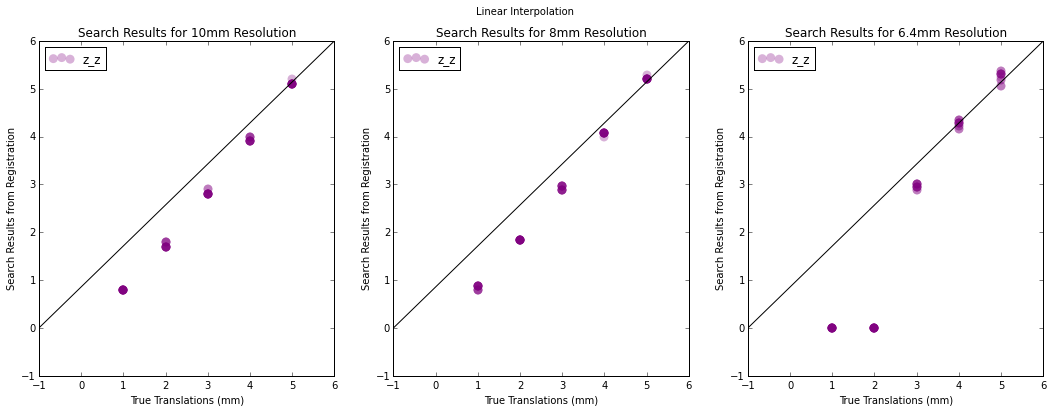

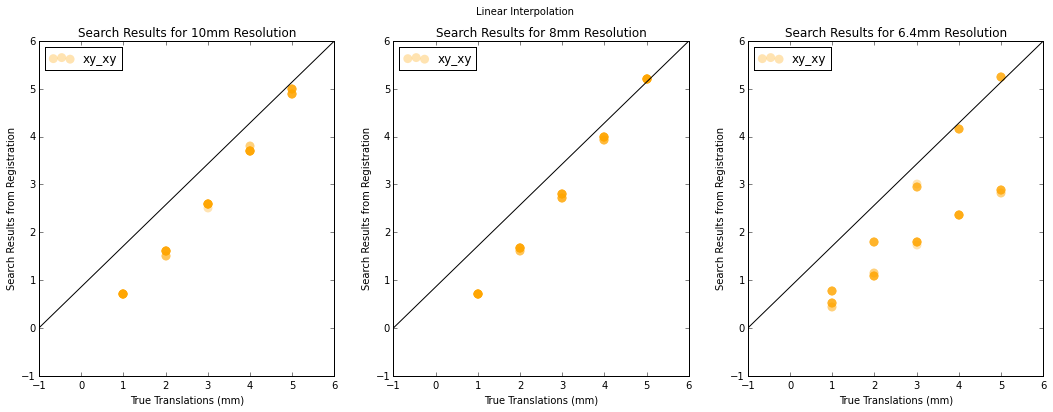

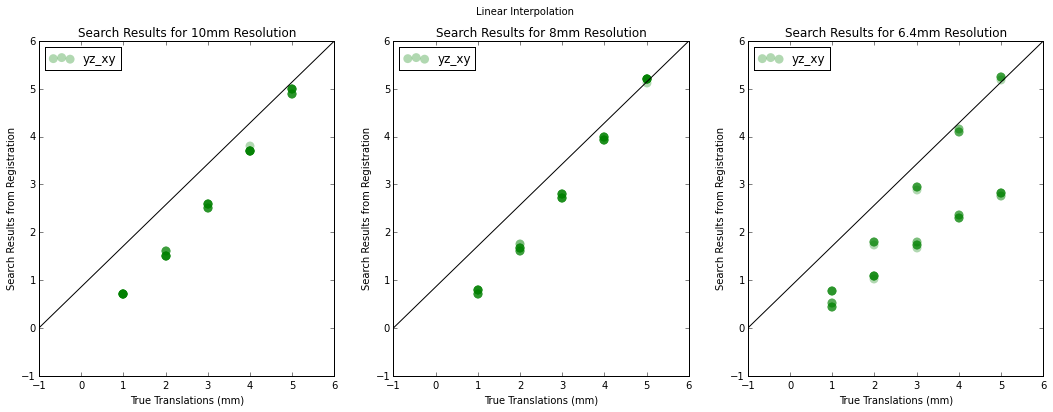

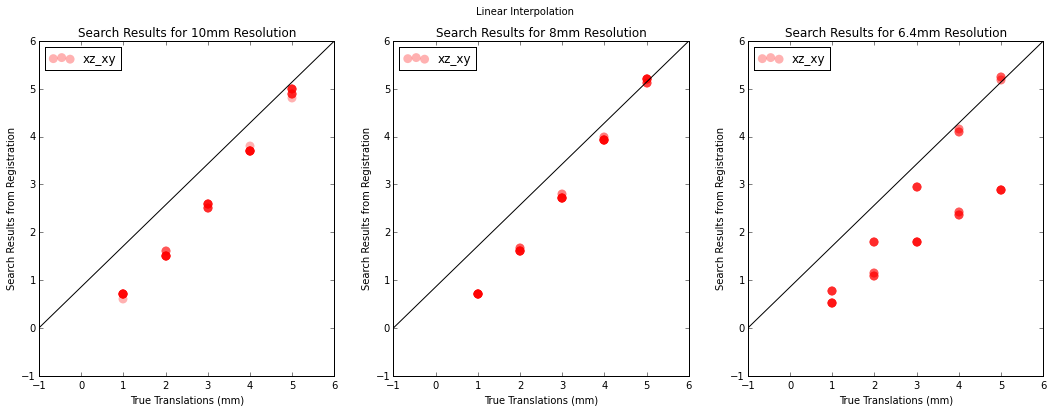

In [15]:
# Linear With Mask
#10mm
cost_dict_10 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/cost_trans_linear1_10_masked.p','rb'))
# 8mm
cost_dict_8 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/cost_trans_linear1_8_masked.p','rb'))
#6.4mm
#cost_dict_6_4 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/cost_trans_linear1_6_4_mask.p','rb'))

# Scatter Plot
scatter_plot_all_trans(['x','y','z','xy','yz','xz'], cost_dict_10, cost_dict_8, cost_dict_6_4, 
                       [18,6], interp = 'Masked Linear')

for ax in ['x','y','z','xy','yz','xz']:
    axes = [ax]
    scatter_plot_all_trans(axes, cost_dict_10, cost_dict_8, cost_dict_6_4, [18,6])

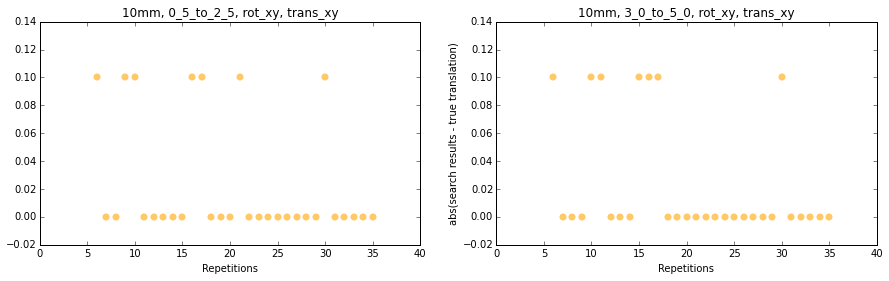

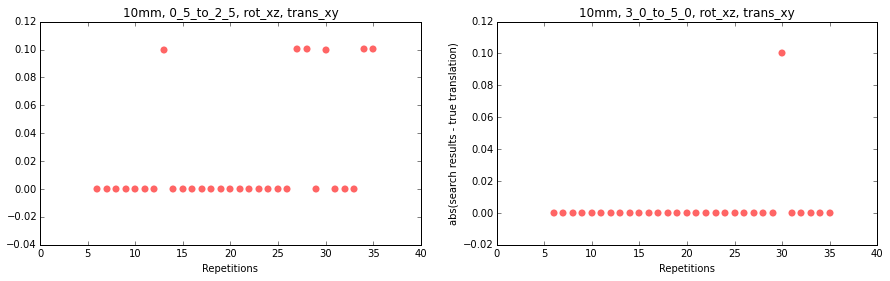

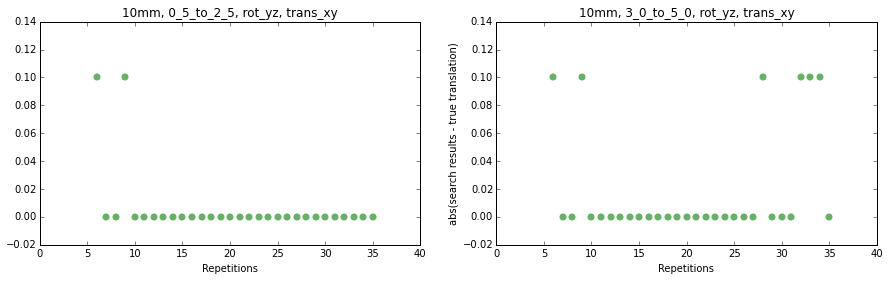

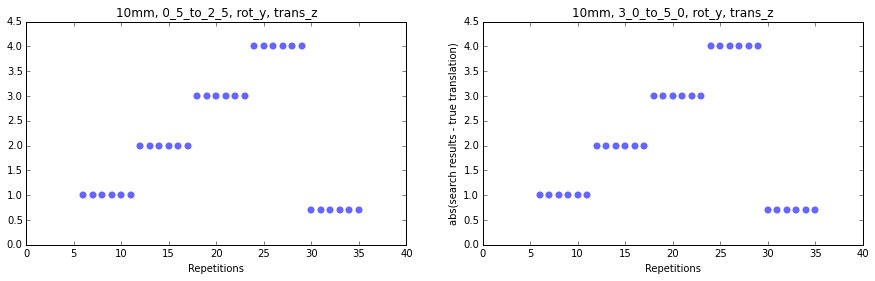

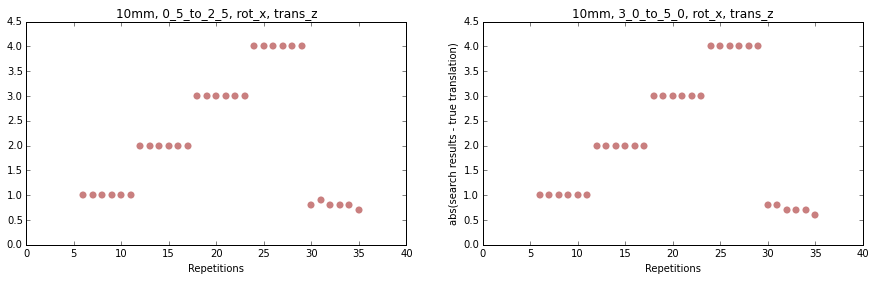

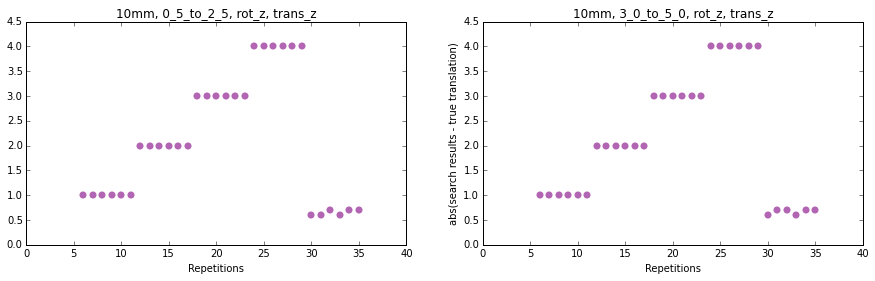

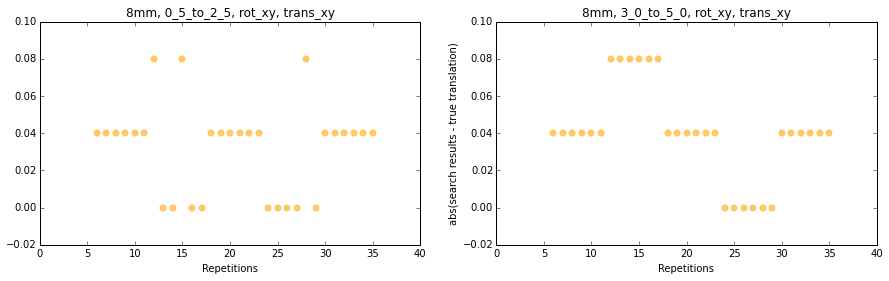

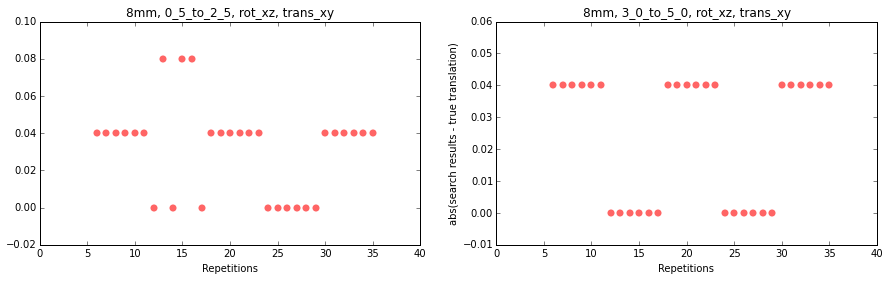

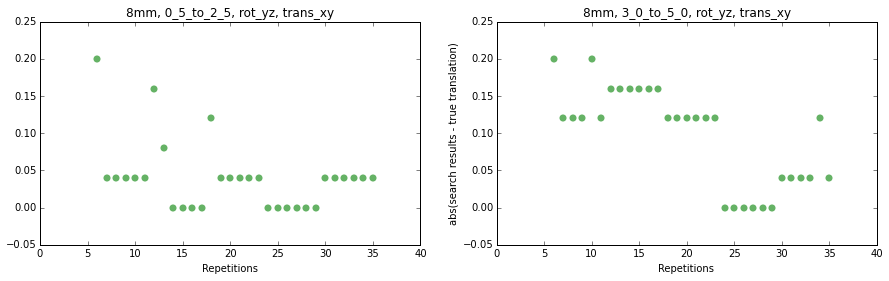

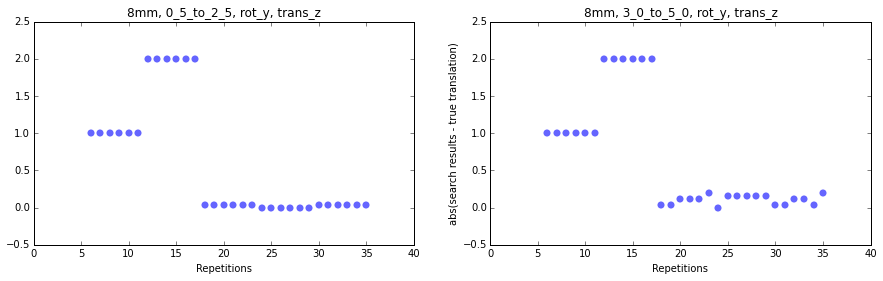

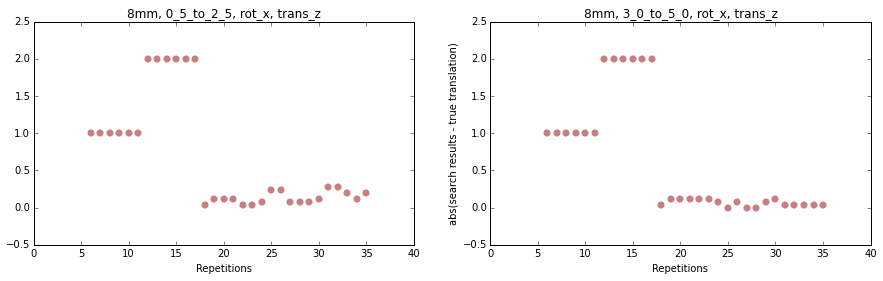

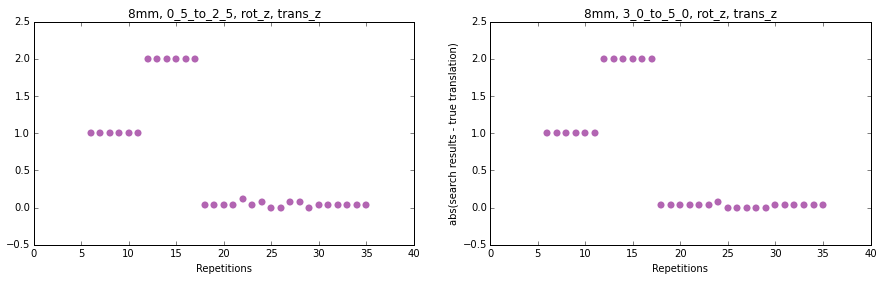

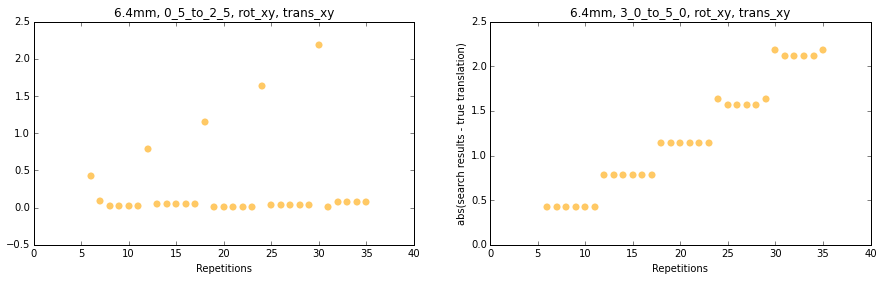

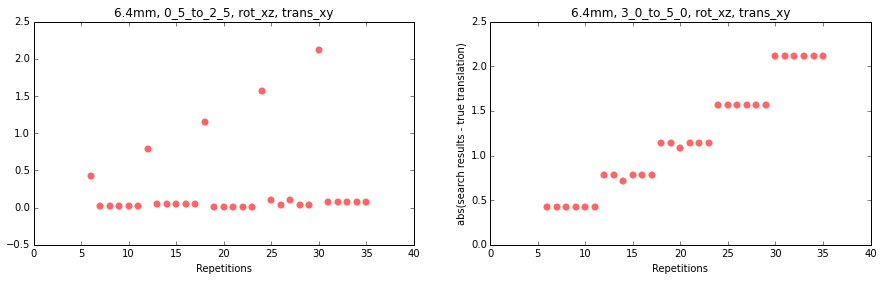

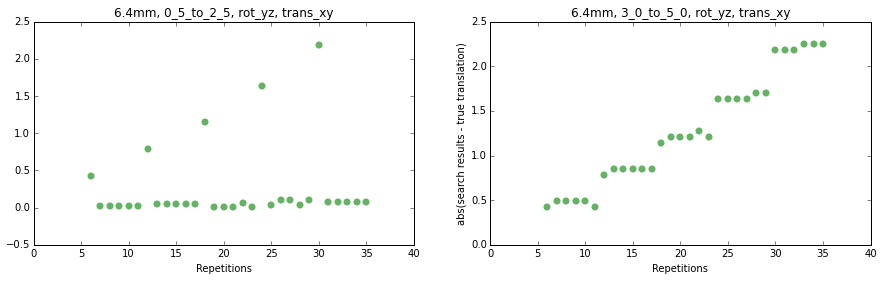

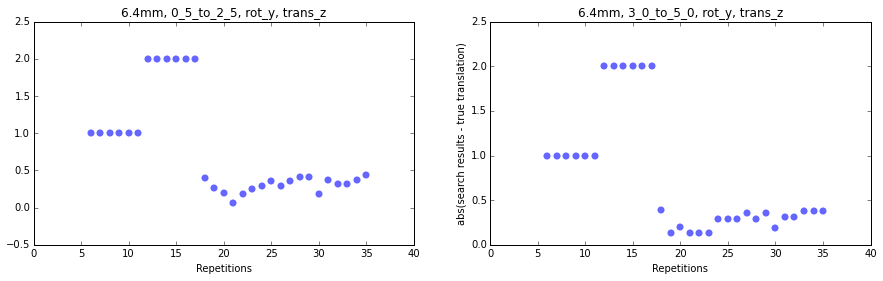

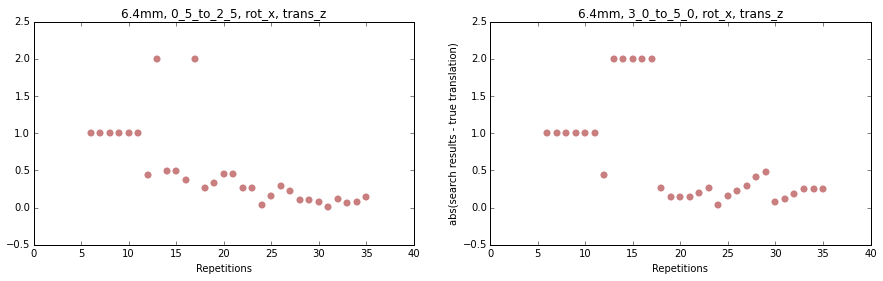

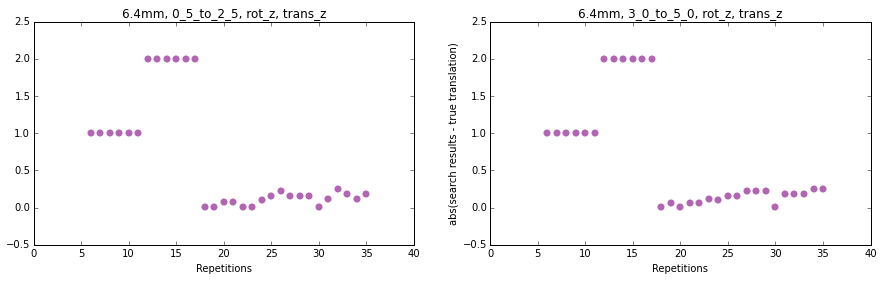

In [17]:
# Cubic No Mask
error_in_time_trans(cost_dict_10,'10mm')
error_in_time_trans(cost_dict_8,'8mm')
error_in_time_trans(cost_dict_6_4,'6.4mm')

In [ ]:
# # Tricubic Interpolation Results
# cost_dict_10 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/sept23_tricubic_10_rotation_01.p','rb'))
# #cost_dict_8 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/sept23_tricubic_8_rotation_01.p','rb'))
# cost_dict_6_4 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/sept23_tricubic_6_4_rotation_01.p','rb'))
# plt.figure(figsize = [18,6])
# plt.subplot(1,3,1)
# scatter_plot_cubic(cost_dict_10, '10mm', axes_dict.keys(),0.1)
# #plt.subplot(1,3,2)
# #scatter_plot_cubic(cost_dict_8, '8mm', axes_dict.keys(),0.1)
# plt.subplot(1,3,3)
# scatter_plot_cubic(cost_dict_6_4, '6.4mm', axes_dict.keys(),0.1)
# plt.show()